# An Introduction to Pandas

* Includes material from Chapter 2 of *Learning IPython for Interactive Computing and Data Visualization*, 2nd ed., by Cyrille Rossant, Packt Publishing, 2015.

* Includes material from *Python for Data Analysis* by Wes McKinney, 2nd ed., O'Reilly, 2017.

* Also includes material from the [seaborn](https://seaborn.pydata.org) documentation.

---

> Panos Louridas, Professor <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> louridas@aueb.gr

# Setting the Scene

* We start by importing a few of the packages we'll need.

* Most data analytics in Python is performed using the following packages:

   * [NumPy](https://www.numpy.org/)
   
   * [pandas](https://pandas.pydata.org/)
   
   * [matplotlib](https://matplotlib.org/)
   
   * [seaborn](https://seaborn.pydata.org)
   
   * [scipy](https://www.scipy.org/)
   
* To perform the analysis, we will be using [Jupyter](http://jupyter.org/).

* If you are using the Anaconda distribution, these packages are already included. 

* If you are using standard Python, you can install them with:

   * `pip install numpy`
   * `pip install pandas`
   * `pip install matplotlib`
   * `pip install seaborn`
   * `pip install scipy`
   * `pip install jupyter` 
   
* Note that if you have both version 2 and version 3 of Python installed you may need to use `pip3`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Where Do New Yorkers Take Taxis?

* The data we'll use was originally obtained by [Chris Wong](https://chriswhong.com/) through a [Freedom of Information Law (FOIL) request](https://chriswhong.com/open-data/foil_nyc_taxi/) in 2013. It is now available from or from https://auebgr-my.sharepoint.com/:f:/g/personal/louridas_aueb_gr/EsI6dclkpFRCqNLLWQEtXF0BfAyo0FyeTkxETf2RG1pvlA?e=8sk5MP.

* A sample of 1% of the data is available at https://auebgr-my.sharepoint.com/:u:/g/personal/louridas_aueb_gr/EckJ1SZrQtRKno-4kR7wDxMBCXUzBN7w4pT7GPsRxlC2gA?e=vHuBPd.

* Newer versions of the data are available from the [NYC Taxi and Limousine Commission (TLC)](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page).

* For practical reasons we'll use the sample, not the full data.

* After uncompressing we get two files, `data/nyc_taxi_trip_data_sample.csv` and `data/nyc_taxi_fare_data_sample.csv`.

* We'll now use the `data/nyc_taxi_trip_data_sample.csv` file.

* Let's have a look at the form of the data.


```
medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
037CB433AB5895649F7A9EF37F767EF1,F57FA13A6A82FE2F40D9DB0193DE0FEE,VTS,1,,2013-10-04 20:20:00,2013-10-04 20:42:00,1,1320,4.05,-73.990089,40.723377,-73.941559,40.70779
E05E952B2DA14C7E9F1D7DEB80667739,11A3989B7BABB288FA3FA233E348C450,CMT,1,N,2013-09-27 14:16:04,2013-09-27 14:37:17,1,1273,2.10,-73.960022,40.710678,-73.994324,40.722858
51B267141807D0261EEB1844D2A78087,9DE60DFD683336F899D5BB448CE7CB09,CMT,1,N,2013-07-18 13:24:37,2013-07-18 13:29:27,3,290,.90,-73.970634,40.76041,-73.960213,40.770241
76AC5C0F44D07BA5A2291F19E730B0B9,2348E03BB8227595281D9D6B38E45B38,VTS,1,,2013-06-25 12:12:00,2013-06-25 12:28:00,2,960,1.28,-73.992661,40.752766,-73.975952,40.751781
```

* The data is in the CSV format (comma separated values).

* A files comprises records, one per row.

* In each row, each field of the record is separated by comma (or some other delimiter) from the next field.

* In this way we can think of rows composed of columns.

* The first row may contain the names of the columnns, in which case it is a header.

* Parsing a CSV file without an appropriate library is complicated because there are rules for escaping commas when they are inside a column, etc.

# An Interlude Concerning the Perils of Anonymization

* The data were supposedly anonymized, by masking the identity of the taxi.

* Taxis are identified by their [medallion](https://en.wikipedia.org/wiki/Taxi_medallion) or their hack license.

* Taxi medallions have a [specific format](http://www.nyc.gov/html/tlc_medallion_info/html/tlc_lookup.shtml).

* The masking (attempt at anonymization) was running the medallion through [MD5](https://en.wikipedia.org/wiki/MD5).

* Then, of course, it is very easy to reverse the process.

In [2]:
import hashlib

m = hashlib.md5()
# Suppose we know a taxi with medallion ABC123, we can immediately get the masked value.
m.update(b'ABC123')
m.hexdigest()

'bbf2dead374654cbb32a917afd236656'

* The taxi medallion formats can be:

  * one number, one letter, two numbers. For example: 5X55
  
  * two letters, three numbers. For example: XX555

  * three letters, three numbers. For example: XXX555
  
 * It is easy to compute all possible hash values, less than 19 million, put them in a lookup table, and deanonymize all the data.

In [3]:
# Number of different possible medallions
(10 * 26 * 10 * 10) + (26 * 26 * 10 * 10 * 10) + (26 * 26 * 26 * 10 * 10 * 10)

18278000

# Reading the Data

* We'll use the `read_csv()` function provided by Pandas.


In [4]:
trips = pd.read_csv('data/nyc_taxi_trip_data_sample.csv')

# Dataframes

* The `trips` variable is a `DataFrame` object. 

* A `DataFrame` is a table containing rows (observations or samples) and columns (features or variables). 

* DataFrames can contain text, numbers, dates, and other types of data. 

In [5]:
trips

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,037CB433AB5895649F7A9EF37F767EF1,F57FA13A6A82FE2F40D9DB0193DE0FEE,VTS,1,NaN,2013-10-04 20:20:00,2013-10-04 20:42:00,1,1320,4.05,-73.990089,40.723377,-73.941559,40.707790
1,E05E952B2DA14C7E9F1D7DEB80667739,11A3989B7BABB288FA3FA233E348C450,CMT,1,N,2013-09-27 14:16:04,2013-09-27 14:37:17,1,1273,2.10,-73.960022,40.710678,-73.994324,40.722858
2,51B267141807D0261EEB1844D2A78087,9DE60DFD683336F899D5BB448CE7CB09,CMT,1,N,2013-07-18 13:24:37,2013-07-18 13:29:27,3,290,0.90,-73.970634,40.760410,-73.960213,40.770241
3,76AC5C0F44D07BA5A2291F19E730B0B9,2348E03BB8227595281D9D6B38E45B38,VTS,1,NaN,2013-06-25 12:12:00,2013-06-25 12:28:00,2,960,1.28,-73.992661,40.752766,-73.975952,40.751781
4,739323AC15DADABE4B54561CB3330C53,9387A0902D7B1B4597802BE63AE7C34F,VTS,1,NaN,2013-04-19 05:28:00,2013-04-19 05:38:00,1,600,2.22,-73.999107,40.727924,-73.974869,40.741886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731792,5DAE4FE51457F5B4D4950D00A0AD4394,B76DC9DC874EB9D71CC04ABC0D9AAC6A,CMT,1,N,2013-08-02 03:34:00,2013-08-02 03:51:47,2,1067,6.00,-73.995766,40.764359,-73.920052,40.775574
1731793,3C16CFAD2B12F3508F7211C37F8F8B8F,A36B62F2B6D1D6C289519810E66EAAB9,VTS,1,NaN,2013-02-21 12:44:00,2013-02-21 13:11:00,6,1620,3.94,0.000000,0.000000,0.000000,0.000000
1731794,23E5F1FDC96168E865BF7B4427C0163B,E7D75D6D6F2DBD7D25578F02991193D9,VTS,1,NaN,2013-02-16 17:24:00,2013-02-16 17:30:00,3,360,2.15,-73.991554,40.726940,-73.971642,40.751362
1731795,FE44D1131D86D515C88D5296598DD35A,015615BB1B66BA269602ED1A867271FA,CMT,1,N,2013-05-24 10:29:16,2013-05-24 10:44:39,1,923,7.20,-73.865715,40.771168,-73.809006,40.700127


* We can see the dimensions of a `DataFrame` using `shape`.

In [6]:
trips.shape

(1731797, 14)

* The `head()` method shows the first lines of a DataFrame.

In [7]:
trips.head(3)

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,037CB433AB5895649F7A9EF37F767EF1,F57FA13A6A82FE2F40D9DB0193DE0FEE,VTS,1,NaN,2013-10-04 20:20:00,2013-10-04 20:42:00,1,1320,4.05,-73.990089,40.723377,-73.941559,40.707790
1,E05E952B2DA14C7E9F1D7DEB80667739,11A3989B7BABB288FA3FA233E348C450,CMT,1,N,2013-09-27 14:16:04,2013-09-27 14:37:17,1,1273,2.10,-73.960022,40.710678,-73.994324,40.722858
2,51B267141807D0261EEB1844D2A78087,9DE60DFD683336F899D5BB448CE7CB09,CMT,1,N,2013-07-18 13:24:37,2013-07-18 13:29:27,3,290,0.90,-73.970634,40.760410,-73.960213,40.770241


* We can also use the familiar Python slicing syntax.

In [8]:
trips[:3]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,037CB433AB5895649F7A9EF37F767EF1,F57FA13A6A82FE2F40D9DB0193DE0FEE,VTS,1,NaN,2013-10-04 20:20:00,2013-10-04 20:42:00,1,1320,4.05,-73.990089,40.723377,-73.941559,40.707790
1,E05E952B2DA14C7E9F1D7DEB80667739,11A3989B7BABB288FA3FA233E348C450,CMT,1,N,2013-09-27 14:16:04,2013-09-27 14:37:17,1,1273,2.10,-73.960022,40.710678,-73.994324,40.722858
2,51B267141807D0261EEB1844D2A78087,9DE60DFD683336F899D5BB448CE7CB09,CMT,1,N,2013-07-18 13:24:37,2013-07-18 13:29:27,3,290,0.90,-73.970634,40.760410,-73.960213,40.770241


* Similarly, the `tail()` method shows the last lines of a `DataFrame`.

In [9]:
trips.tail(3)

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
1731794,23E5F1FDC96168E865BF7B4427C0163B,E7D75D6D6F2DBD7D25578F02991193D9,VTS,1,NaN,2013-02-16 17:24:00,2013-02-16 17:30:00,3,360,2.15,-73.991554,40.726940,-73.971642,40.751362
1731795,FE44D1131D86D515C88D5296598DD35A,015615BB1B66BA269602ED1A867271FA,CMT,1,N,2013-05-24 10:29:16,2013-05-24 10:44:39,1,923,7.20,-73.865715,40.771168,-73.809006,40.700127
1731796,465FE7E793D67BBB8A7A9869065170E5,E5D211ECD1F6A6164B6CFF1EB9B50499,CMT,1,N,2013-03-15 14:42:10,2013-03-15 14:51:20,1,549,0.70,-74.002968,40.718216,-74.011620,40.708351


* Or again with the familiar Python syntax.

In [10]:
trips[-3:]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
1731794,23E5F1FDC96168E865BF7B4427C0163B,E7D75D6D6F2DBD7D25578F02991193D9,VTS,1,NaN,2013-02-16 17:24:00,2013-02-16 17:30:00,3,360,2.15,-73.991554,40.726940,-73.971642,40.751362
1731795,FE44D1131D86D515C88D5296598DD35A,015615BB1B66BA269602ED1A867271FA,CMT,1,N,2013-05-24 10:29:16,2013-05-24 10:44:39,1,923,7.20,-73.865715,40.771168,-73.809006,40.700127
1731796,465FE7E793D67BBB8A7A9869065170E5,E5D211ECD1F6A6164B6CFF1EB9B50499,CMT,1,N,2013-03-15 14:42:10,2013-03-15 14:51:20,1,549,0.70,-74.002968,40.718216,-74.011620,40.708351


* The `describe()` method shows basic statistics of all columns, as shown below.

In [11]:
trips.describe()

,rate_code,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,1.731797e+06,1.731797e+06,1.731797e+06,1.731797e+06,1.731797e+06,1.731797e+06,1.731767e+06,1.731767e+06
mean,1.033927e+00,1.707519e+00,8.110141e+02,3.458005e+00,-7.244724e+01,3.974714e+01,-7.240237e+01,3.972352e+01
std,4.174030e-01,1.373835e+00,1.561974e+04,7.221295e+02,1.122722e+01,8.509423e+00,1.134113e+01,8.562259e+00
min,0.000000e+00,0.000000e+00,-1.000000e+01,0.000000e+00,-7.400217e+02,-3.117494e+03,-1.800000e+02,-3.114296e+03
25%,1.000000e+00,1.000000e+00,3.600000e+02,1.040000e+00,-7.399218e+01,4.073443e+01,-7.399147e+01,4.073352e+01
50%,1.000000e+00,1.000000e+00,6.000000e+02,1.800000e+00,-7.398184e+01,4.075238e+01,-7.398027e+01,4.075280e+01
75%,1.000000e+00,2.000000e+00,9.600000e+02,3.200000e+00,-7.396687e+01,4.076700e+01,-7.396362e+01,4.076778e+01
max,2.100000e+02,7.000000e+00,4.294941e+06,9.500000e+05,5.197732e+01,7.400267e+01,8.431574e+01,7.401300e+01


* The basic library for visualization in Python is matplotlib.

* Visualizing *raw* data, as opposed to aggregated statistics, often allows us to get a general idea about a data set. 

* Here, we will display the pickup locations of all trips.

* The first step is to get the actual coordinates from the `DataFrame`. 

* Let's start by checking the columns of the data.

In [12]:
trips.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')

* Four columns represent latitude and longitude.

  * `pickup_longitude`
  * `pickup_latitude`
  * `dropoff_longitude`
  * `dropoff_latitude`

* We'll use those that refer to pickup locations.

* We can refer to a `DataFrame` column by giving the `DataFrame` name, a dot, and the name of the column:

In [13]:
trips.pickup_longitude

0         -73.990089
1         -73.960022
2         -73.970634
3         -73.992661
4         -73.999107
             ...    
1731792   -73.995766
1731793     0.000000
1731794   -73.991554
1731795   -73.865715
1731796   -74.002968
Name: pickup_longitude, Length: 1731797, dtype: float64

* Alternatively, we can use the Python dictionary syntax:

In [14]:
trips['pickup_latitude']

0          40.723377
1          40.710678
2          40.760410
3          40.752766
4          40.727924
             ...    
1731792    40.764359
1731793     0.000000
1731794    40.726940
1731795    40.771168
1731796    40.718216
Name: pickup_latitude, Length: 1731797, dtype: float64

* Each column is an object of type `Series`, where a `Series` is an indexed list of values.

* That means that a `DataFrame` is a group of `Series` columns.

* A while back we saw that some of the `DataFrame` values do not make sense.

* Latitude should be between 0 και 90 degrees.

* But is it really so?

* We can find out by calling the appropriate methods in the `Series` object of the appropriate column.

* By the way, note the difference in the output when using `print()` vs when just outputting a tuple to the Jupyter cell.


In [15]:
print(trips['pickup_latitude'].min(), trips['pickup_latitude'].max())
trips['pickup_latitude'].min(), trips['pickup_latitude'].max()

-3117.4944 74.00267


(np.float64(-3117.4944), np.float64(74.00267))

* Similarly, longitude must be between -180 and 0 (in fact less, as long as we don't have amphibious taxis).

In [16]:
print(trips['pickup_longitude'].min(), trips['pickup_longitude'].max())

-740.02167 51.977318


* If we want to filter the values of a column, we start by stating the condition that we want.

* The condition must return a logical vector (with values `True` and `False`).

In [17]:
trips['pickup_latitude'] >= 0

0          True
1          True
2          True
3          True
4          True
           ... 
1731792    True
1731793    True
1731794    True
1731795    True
1731796    True
Name: pickup_latitude, Length: 1731797, dtype: bool

* If we give a logical vector to a `DataFrame`, it will filter out the rows for which the vector has value `False`.

In [18]:
print(trips.shape[0])
trips[trips['pickup_latitude'] >= 0]

1731797


,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,037CB433AB5895649F7A9EF37F767EF1,F57FA13A6A82FE2F40D9DB0193DE0FEE,VTS,1,NaN,2013-10-04 20:20:00,2013-10-04 20:42:00,1,1320,4.05,-73.990089,40.723377,-73.941559,40.707790
1,E05E952B2DA14C7E9F1D7DEB80667739,11A3989B7BABB288FA3FA233E348C450,CMT,1,N,2013-09-27 14:16:04,2013-09-27 14:37:17,1,1273,2.10,-73.960022,40.710678,-73.994324,40.722858
2,51B267141807D0261EEB1844D2A78087,9DE60DFD683336F899D5BB448CE7CB09,CMT,1,N,2013-07-18 13:24:37,2013-07-18 13:29:27,3,290,0.90,-73.970634,40.760410,-73.960213,40.770241
3,76AC5C0F44D07BA5A2291F19E730B0B9,2348E03BB8227595281D9D6B38E45B38,VTS,1,NaN,2013-06-25 12:12:00,2013-06-25 12:28:00,2,960,1.28,-73.992661,40.752766,-73.975952,40.751781
4,739323AC15DADABE4B54561CB3330C53,9387A0902D7B1B4597802BE63AE7C34F,VTS,1,NaN,2013-04-19 05:28:00,2013-04-19 05:38:00,1,600,2.22,-73.999107,40.727924,-73.974869,40.741886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731792,5DAE4FE51457F5B4D4950D00A0AD4394,B76DC9DC874EB9D71CC04ABC0D9AAC6A,CMT,1,N,2013-08-02 03:34:00,2013-08-02 03:51:47,2,1067,6.00,-73.995766,40.764359,-73.920052,40.775574
1731793,3C16CFAD2B12F3508F7211C37F8F8B8F,A36B62F2B6D1D6C289519810E66EAAB9,VTS,1,NaN,2013-02-21 12:44:00,2013-02-21 13:11:00,6,1620,3.94,0.000000,0.000000,0.000000,0.000000
1731794,23E5F1FDC96168E865BF7B4427C0163B,E7D75D6D6F2DBD7D25578F02991193D9,VTS,1,NaN,2013-02-16 17:24:00,2013-02-16 17:30:00,3,360,2.15,-73.991554,40.726940,-73.971642,40.751362
1731795,FE44D1131D86D515C88D5296598DD35A,015615BB1B66BA269602ED1A867271FA,CMT,1,N,2013-05-24 10:29:16,2013-05-24 10:44:39,1,923,7.20,-73.865715,40.771168,-73.809006,40.700127


* Here we want to enforce the condition that the latitude is between 0 and 90.

* We can combine two logical conditions with the `&` (AND) operator when we want both of them to be true.

* If we want one of them to be true, we use the `|` (OR) operator.

In [19]:
trips[(trips['pickup_latitude'] >= 0) & (trips['pickup_latitude'] <= 90)]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,037CB433AB5895649F7A9EF37F767EF1,F57FA13A6A82FE2F40D9DB0193DE0FEE,VTS,1,NaN,2013-10-04 20:20:00,2013-10-04 20:42:00,1,1320,4.05,-73.990089,40.723377,-73.941559,40.707790
1,E05E952B2DA14C7E9F1D7DEB80667739,11A3989B7BABB288FA3FA233E348C450,CMT,1,N,2013-09-27 14:16:04,2013-09-27 14:37:17,1,1273,2.10,-73.960022,40.710678,-73.994324,40.722858
2,51B267141807D0261EEB1844D2A78087,9DE60DFD683336F899D5BB448CE7CB09,CMT,1,N,2013-07-18 13:24:37,2013-07-18 13:29:27,3,290,0.90,-73.970634,40.760410,-73.960213,40.770241
3,76AC5C0F44D07BA5A2291F19E730B0B9,2348E03BB8227595281D9D6B38E45B38,VTS,1,NaN,2013-06-25 12:12:00,2013-06-25 12:28:00,2,960,1.28,-73.992661,40.752766,-73.975952,40.751781
4,739323AC15DADABE4B54561CB3330C53,9387A0902D7B1B4597802BE63AE7C34F,VTS,1,NaN,2013-04-19 05:28:00,2013-04-19 05:38:00,1,600,2.22,-73.999107,40.727924,-73.974869,40.741886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731792,5DAE4FE51457F5B4D4950D00A0AD4394,B76DC9DC874EB9D71CC04ABC0D9AAC6A,CMT,1,N,2013-08-02 03:34:00,2013-08-02 03:51:47,2,1067,6.00,-73.995766,40.764359,-73.920052,40.775574
1731793,3C16CFAD2B12F3508F7211C37F8F8B8F,A36B62F2B6D1D6C289519810E66EAAB9,VTS,1,NaN,2013-02-21 12:44:00,2013-02-21 13:11:00,6,1620,3.94,0.000000,0.000000,0.000000,0.000000
1731794,23E5F1FDC96168E865BF7B4427C0163B,E7D75D6D6F2DBD7D25578F02991193D9,VTS,1,NaN,2013-02-16 17:24:00,2013-02-16 17:30:00,3,360,2.15,-73.991554,40.726940,-73.971642,40.751362
1731795,FE44D1131D86D515C88D5296598DD35A,015615BB1B66BA269602ED1A867271FA,CMT,1,N,2013-05-24 10:29:16,2013-05-24 10:44:39,1,923,7.20,-73.865715,40.771168,-73.809006,40.700127


* We also want the longitude to be between -180 and 0, so we add the necessary conditions:

In [20]:
trips = trips[(trips['pickup_latitude'] >= 0) 
              & (trips['pickup_latitude'] <= 90) 
              & (trips['pickup_longitude'] >= -180) 
              & (trips['pickup_longitude'] <= 0) 
]

In [21]:
trips

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,037CB433AB5895649F7A9EF37F767EF1,F57FA13A6A82FE2F40D9DB0193DE0FEE,VTS,1,NaN,2013-10-04 20:20:00,2013-10-04 20:42:00,1,1320,4.05,-73.990089,40.723377,-73.941559,40.707790
1,E05E952B2DA14C7E9F1D7DEB80667739,11A3989B7BABB288FA3FA233E348C450,CMT,1,N,2013-09-27 14:16:04,2013-09-27 14:37:17,1,1273,2.10,-73.960022,40.710678,-73.994324,40.722858
2,51B267141807D0261EEB1844D2A78087,9DE60DFD683336F899D5BB448CE7CB09,CMT,1,N,2013-07-18 13:24:37,2013-07-18 13:29:27,3,290,0.90,-73.970634,40.760410,-73.960213,40.770241
3,76AC5C0F44D07BA5A2291F19E730B0B9,2348E03BB8227595281D9D6B38E45B38,VTS,1,NaN,2013-06-25 12:12:00,2013-06-25 12:28:00,2,960,1.28,-73.992661,40.752766,-73.975952,40.751781
4,739323AC15DADABE4B54561CB3330C53,9387A0902D7B1B4597802BE63AE7C34F,VTS,1,NaN,2013-04-19 05:28:00,2013-04-19 05:38:00,1,600,2.22,-73.999107,40.727924,-73.974869,40.741886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731792,5DAE4FE51457F5B4D4950D00A0AD4394,B76DC9DC874EB9D71CC04ABC0D9AAC6A,CMT,1,N,2013-08-02 03:34:00,2013-08-02 03:51:47,2,1067,6.00,-73.995766,40.764359,-73.920052,40.775574
1731793,3C16CFAD2B12F3508F7211C37F8F8B8F,A36B62F2B6D1D6C289519810E66EAAB9,VTS,1,NaN,2013-02-21 12:44:00,2013-02-21 13:11:00,6,1620,3.94,0.000000,0.000000,0.000000,0.000000
1731794,23E5F1FDC96168E865BF7B4427C0163B,E7D75D6D6F2DBD7D25578F02991193D9,VTS,1,NaN,2013-02-16 17:24:00,2013-02-16 17:30:00,3,360,2.15,-73.991554,40.726940,-73.971642,40.751362
1731795,FE44D1131D86D515C88D5296598DD35A,015615BB1B66BA269602ED1A867271FA,CMT,1,N,2013-05-24 10:29:16,2013-05-24 10:44:39,1,923,7.20,-73.865715,40.771168,-73.809006,40.700127


* Before we can make a plot, we need to get the coordinates of points in pixels instead of geographical coordinates. 

* We can use the following function that performs a [Mercator](https://en.wikipedia.org/wiki/Gerardus_Mercator) projection (Gerardus Mercator was a 16th century Flemish geographer and cartographer).

* It is actually a [Web Mercator projection](https://en.wikipedia.org/wiki/Web_Mercator_projection) adapted so that point(0, 0) is at the lower left (instead of the upper left).

* That said, the area of NYC is probably small enough so that we could plot directly the geographical (spherical) coordinates on it pretending the earth is flat, but be it as it may.

In [22]:
def lng_lat_to_pixels(lng, lat):    
    lng_rad = lng * np.pi / 180
    lat_rad = lat * np.pi / 180
    x = (256/(2*np.pi))*(lng_rad + np.pi)
    y = (256/(2*np.pi))*(np.log(np.tan(np.pi/4 + lat_rad/2)))
    return (x, y)

* NumPy implements many mathematical functions like `np.log()` and `np.tan()`. 

* These functions work on scalar numbers and also on pandas objects such as `Series`. 

* The following function call returns two new `Series` `px` and `py`.

In [23]:
px, py = lng_lat_to_pixels(trips['pickup_longitude'], trips['pickup_latitude'])
px.head(10)

0    75.384826
1    75.406207
2    75.398660
3    75.382997
4    75.378413
5    75.383789
6    75.384993
7    75.414177
8    75.391119
9    75.388048
Name: pickup_longitude, dtype: float64

* The matplotlib `scatter()` function takes two arrays with x and y coordinates as inputs. 

* A scatter plot is a common 2D  figure showing points with various positions, sizes, colors, and marker shapes. 

* The following command displays all pickup locations.

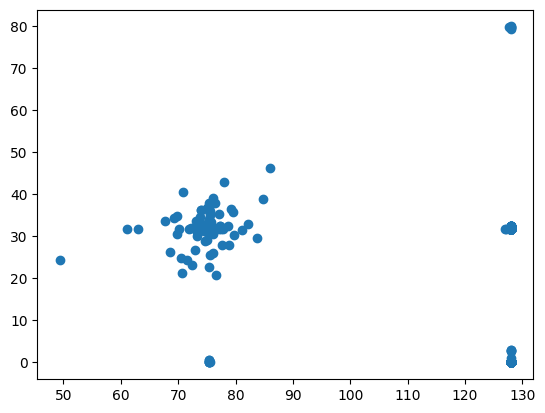

In [24]:
_ = plt.scatter(px, py)

* That's fine, but there are a number of problems.

* First, the markers are too big. 

* Second, there are too many points; but apparently they all fall on each other.

* We could make them a bit transparent to have a better idea of the distribution of the points. 

* Third, we may want to zoom a bit more around Manhattan. 

* Fourth, the figure could be made bigger.

* And finally, we don't necessarily need the axes here.

* Fortunately matplotlib is highly customizable.

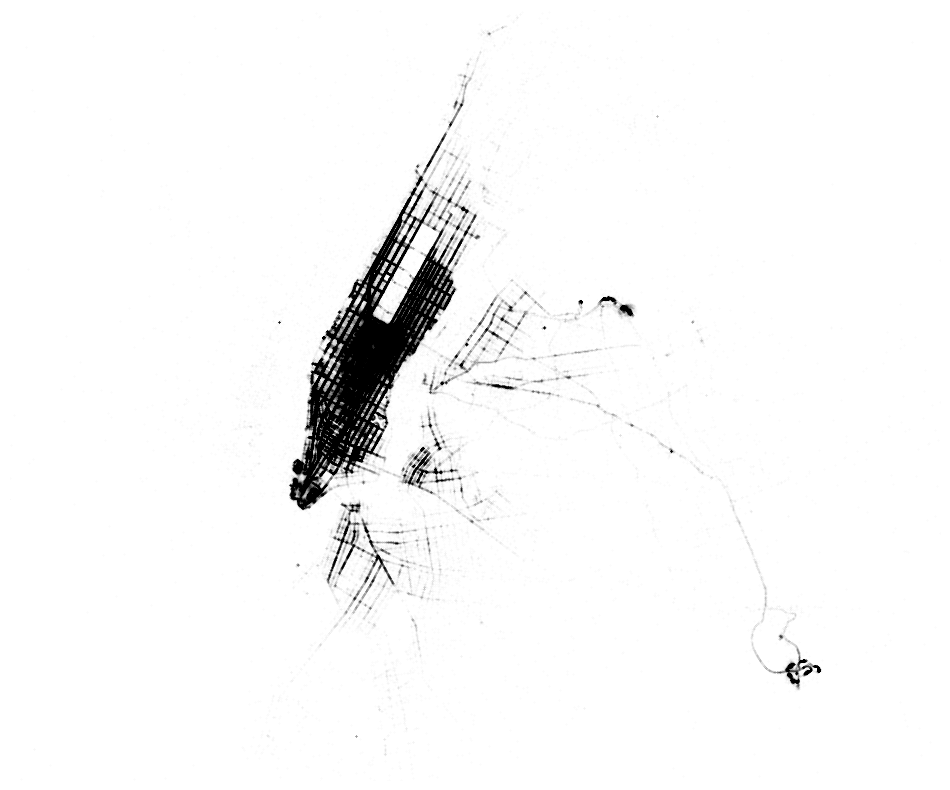

In [25]:
plt.figure(figsize=(12, 10))
plt.axis('equal')
plt.xlim(75.3, 75.55)
plt.ylim(31.65, 31.90)
plt.axis('off')
_ = plt.scatter(px, py, s=.1, alpha=.03, color='black')

* The `figure()` function lets us specify the figure size (in inches).

* The `scatter()` function accepts many keyword arguments to customize the aspect of the scatter plot. Here:

   * We use a small marker size with the `s` keyword argument.

   * We use a small `alpha` opacity value: the points become nearly transparent, which emphasizes the regions with high density.
   
   * We use an equal aspect ratio with `axis('equal')`.
   
   * We zoom in by specifying the limits of the x and y axes with `xlim()` and `ylim()`.
   
   * We remove the axes with `axes('off')`.

# How Far Do New Yorkers Travel?

* We saw how we can get an overview of the values of a `DataFrame` using the `describe()` method.

* We can investigate the values of a particular column by calling corresponding methods in its `Series` object.

In [26]:
print(trips['trip_distance'].count(), 
      trips['trip_distance'].min(), 
      trips['trip_distance'].max())

1726326 0.0 950000.0


* Or:

In [27]:
print(trips['trip_distance'].mean(), 
      trips['trip_distance'].median(), 
      trips['trip_distance'].std())

3.458948240367117 1.8 723.2727891378296


* If the average (mean) distance is about 3.5 miles and the median distance is 1.8 miles, which is the most common distance, i.e., the mode?

In [28]:
trips['trip_distance'].mode()

0    1.0
Name: trip_distance, dtype: float64

* And which are the top-10 most common distances travelled?

* The method `value_counts()` counts each discrete value and puts them in descending order.

* If we wanted them in ascending order, we would add the parameter `ascending=True`.

In [29]:
trips['trip_distance'].value_counts()

trip_distance
1.00     43398
0.90     38466
0.80     37634
1.10     37424
1.20     36037
         ...  
34.28        1
36.00        1
41.06        1
32.90        1
24.87        1
Name: count, Length: 3000, dtype: int64

* There are thousands unique values, as we see.

* To get the top 10 of them we need to ask the top 10 elements of the `value_counts()` output.

* We can try slicing:

In [30]:
trips['trip_distance'].value_counts()[:10]

trip_distance
1.00     43398
0.90     38466
0.80     37634
1.10     37424
1.20     36037
         ...  
2.59      1347
2.64      1330
0.42      1323
2.61      1314
10.00     1312
Name: count, Length: 275, dtype: int64

* This is not what we expected.

* The reason is that slicing returns the rows until it encounters a row whose *label* is equal to 10.

* But we want the first ten rows *by position*.

* To select by position in pandas, we use `iloc[]`.

In [31]:
trips['trip_distance'].value_counts().iloc[:10]

trip_distance
1.0    43398
0.9    38466
0.8    37634
1.1    37424
1.2    36037
0.7    34577
1.3    33979
1.4    32454
1.5    31053
0.6    30342
Name: count, dtype: int64

* The label-based counterpart to `iloc[]` is `loc[]`, which, as we saw, is not what we need here.

In [32]:
trips['trip_distance'].value_counts().loc[:10]

trip_distance
1.00     43398
0.90     38466
0.80     37634
1.10     37424
1.20     36037
         ...  
2.59      1347
2.64      1330
0.42      1323
2.61      1314
10.00     1312
Name: count, Length: 275, dtype: int64

* We'll make a histogram.

* Facilities for creating histograms are included in pandas.

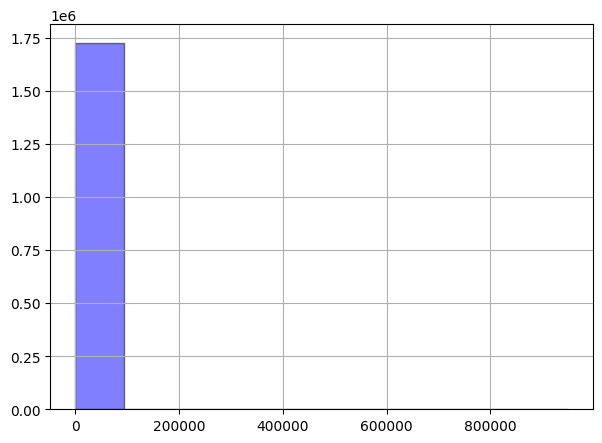

In [33]:
_ = trips.trip_distance.hist(color='blue', edgecolor='black', alpha=0.5, 
                             figsize=(7, 5))

* Again, this is not what we expected.

* The reason is that we have trips from 0 to 950,000 miles.

* We had better restrict our trips from 0 to 10 miles.

* We'll use NumPy's `linspace()` function to generate 100 linearly-spaced values between 0 and 10.

In [34]:
np.linspace(0., 10., 100)

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

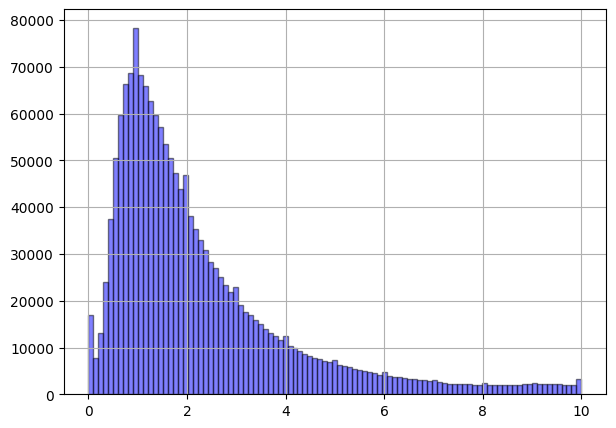

In [35]:
_ = trips.trip_distance.hist(bins=np.linspace(0, 10, 100), 
                             color='blue', edgecolor='black', 
                             alpha=0.5, figsize=(7, 5))

* We can observe some peaks in the histogram

* Let's find out where they come from.

* Let's see the counts for each bin (with one minor difference, in the diagram the bins are left-closed and right-open, which is the opposite of what we get here).

In [36]:
trips['trip_distance'].value_counts(bins=np.linspace(0, 10, 100))

(0.909, 1.01]     78411
(0.808, 0.909]    68773
(1.01, 1.111]     68208
(0.707, 0.808]    66331
(1.111, 1.212]    65878
                  ...  
(9.697, 9.798]     2014
(7.879, 7.98]      2001
(8.485, 8.586]     1993
(8.283, 8.384]     1974
(9.798, 9.899]     1965
Name: count, Length: 99, dtype: int64

* To find the peaks, we need to compare the value count of each bin to the value counts of its neighboring bins.

* Right now they come sorted by the number of trips in each bin.

* We'll need to sort them by the order of each bin, the label of the results of `value_counts()`.

* That is, we want to sort them using the index of the results of `value_counts()`.

In [37]:
trips_distance_counts = trips['trip_distance'].\
    value_counts(bins=np.linspace(0, 10, 100)).\
    sort_index()
trips_distance_counts

(-0.001, 0.101]    16964
(0.101, 0.202]      7719
(0.202, 0.303]     13077
(0.303, 0.404]     24109
(0.404, 0.505]     37384
                   ...  
(9.495, 9.596]      2133
(9.596, 9.697]      2019
(9.697, 9.798]      2014
(9.798, 9.899]      1965
(9.899, 10.0]       3205
Name: count, Length: 99, dtype: int64

* Now that we have the trips sorted by bin, from the first bin (0 up to 0.10 miles) to the last (9.90 miles to 10 miles), we can find the peaks by comparing the neighbors.

* We can then use `find_peaks()` from scipy to identify the peaks.

* `find_peaks()` will return the positions of the peaks (it will also return a dictionary with extra information we may ask, it will be empty in our example and we'll ignore it).

In [38]:
from scipy.signal import find_peaks

peaks, _ = find_peaks(trips_distance_counts)
peaks

array([ 9, 19, 29, 39, 49, 59, 69, 79, 83, 89, 91, 93])

* Finally, we can get the bins that correspond to the positions.

* We'll use the `iloc` method which, as we saw, locates the rows of the `DateFrame` at the specified positions.

In [39]:
trips_distance_counts.iloc[peaks]

(0.909, 1.01]     78411
(1.919, 2.02]     46829
(2.929, 3.03]     23002
(3.939, 4.04]     12517
(4.949, 5.051]     7301
(5.96, 6.061]      4734
(6.97, 7.071]      3021
(7.98, 8.081]      2336
(8.384, 8.485]     2018
(8.99, 9.091]      2414
(9.192, 9.293]     2159
(9.394, 9.495]     2139
Name: count, dtype: int64

* So, most peaks occur around round values.


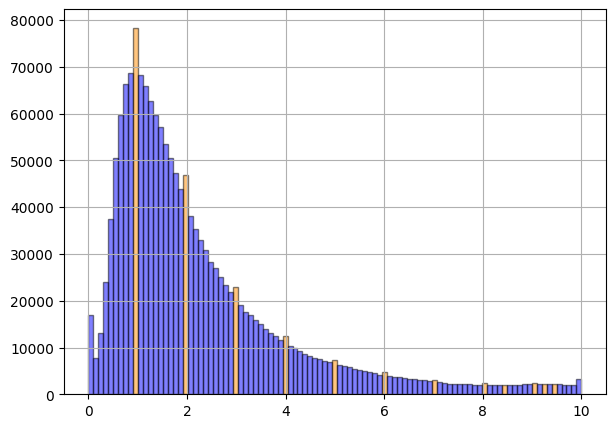

In [40]:
ax = trips.trip_distance.hist(bins=np.linspace(0, 10, 100), 
                              color='blue', edgecolor='black', 
                              alpha=0.5, figsize=(7, 5))
for i in peaks:
    ax.patches[i].set_facecolor('darkorange')

* Now, one might ask, why not create 100 bins, instead of 99 (which we got by using the 100 borders)?

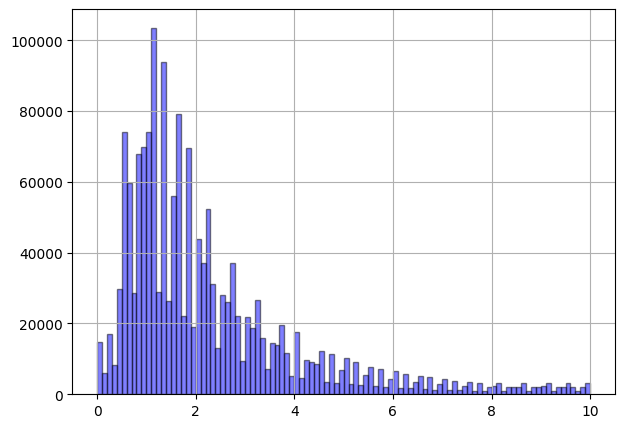

In [41]:
_ = trips.trip_distance.hist(bins=np.linspace(0, 10, 100+1), 
                             color='blue', edgecolor='black', 
                             alpha=0.5, figsize=(7, 5))

* Not a good idea.

* It appears that rounding is even more pronounced here.

* Can we check the actual values?

In [42]:
trips['trip_distance'].value_counts(bins=np.linspace(0, 10, 100+1))

(0.9, 1.0]    74925
(0.8, 0.9]    68773
(1.0, 1.1]    68216
(0.7, 0.8]    66331
(1.1, 1.2]    66156
              ...  
(8.1, 8.2]     2008
(9.7, 9.8]     1993
(8.3, 8.4]     1983
(7.8, 7.9]     1935
(9.8, 9.9]     1877
Name: count, Length: 100, dtype: int64

* By getting the first 20, we should see clear evidence of the peaks and troughs.

* But we don't!

In [43]:
trip_distance_counts = trips['trip_distance'].\
    value_counts(bins=np.linspace(0, 10, 100+1)).\
    sort_index()
trip_distance_counts.iloc[:20]

(-0.001, 0.1]    16964
(0.1, 0.2]        7719
(0.2, 0.3]       13077
(0.3, 0.4]       24109
(0.4, 0.5]       37384
(0.5, 0.6]       50465
(0.6, 0.7]       59642
(0.7, 0.8]       66331
(0.8, 0.9]       68773
(0.9, 1.0]       74925
(1.0, 1.1]       68216
(1.1, 1.2]       66156
(1.2, 1.3]       62745
(1.3, 1.4]       60002
(1.4, 1.5]       57269
(1.5, 1.6]       53655
(1.6, 1.7]       50598
(1.7, 1.8]       47443
(1.8, 1.9]       44034
(1.9, 2.0]       45020
Name: count, dtype: int64

* Let's draw that as a bare-bones bar chart.

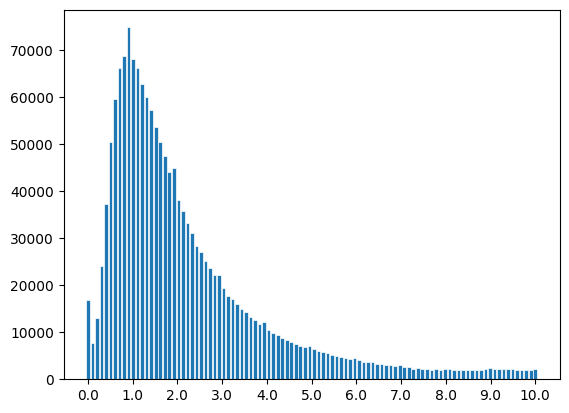

In [44]:
plt.bar(range(100), 
        trip_distance_counts,
        edgecolor='white',
        linewidth=0.5)
xticks = np.linspace(0, 10, 11)
xtick_labels = [str(round(val, 1)) for val in xticks]
_ = plt.xticks(np.linspace(0, 99, 11), xtick_labels)

* The peaks and troughs disappeared.

* Why?

* Well, because as we noted above, the `hist()` method uses intervals of the form `[)` while we have been binning with intervals of the form `(]`.

* And rounding happens right at the edges of the intervals...

* Devil is always in the details.

* We constrained our attention to rides up to 10 miles.

* Now, let's select the longest rides.

* Which are the longest rides? We can decide upon a 50 miles threshold.

In [45]:
trips.loc[trips.trip_distance>50]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
8768,5B6ED34F2D0F49ECB42F28CF323F7010,B94FA80A43A0BD012E863DD26F561544,CMT,5,N,2013-08-21 02:40:29,2013-08-21 02:59:51,1,1162,53.60,-74.006355,40.744438,-74.032791,40.728535
13035,8B96CFDC984B688A0B9D6AE1A027423D,6470FFACDCD65163F02E638C1E27A366,CMT,2,N,2013-11-23 11:10:05,2013-11-23 12:23:36,1,4410,53.90,-73.873940,40.646400,-74.508736,40.366634
15826,A23AEF466CC7EFFEA7A4BCCEDA1C82D2,9DE1F1730724F84C0C51906993802831,CMT,1,N,2013-11-02 08:54:25,2013-11-02 11:27:27,2,9180,53.10,-73.801987,40.675346,-74.500114,40.541981
29251,1D63D831583C751816DFB6BC7B910BC9,9C2E1C0BB311E30ABE89F4F13D1300D2,VTS,2,NaN,2013-07-22 15:01:00,2013-07-22 17:47:00,1,9960,51.75,-73.984825,40.746948,-73.782677,40.644043
39755,66B35E773D495CB81C738625A33C619D,BCD0DF8369B6A2E999B9E92159F92BBB,CMT,1,N,2013-03-16 22:39:33,2013-03-16 23:09:19,1,28,61.30,-73.947723,40.685150,-73.962105,40.662872
40369,3DCFC9097488D3F93982ED4A899C6E24,0420EC44A00B1764DADD034981FC24D3,CMT,2,N,2013-08-23 00:55:40,2013-08-23 01:17:30,1,1310,950000.00,-73.971779,40.760525,-73.987122,40.697540
80447,3C924E0BAC6BFA78783E4A93EB461E84,0EB9EF92340ABDAC8850EE85E548A492,CMT,1,N,2013-01-16 14:23:09,2013-01-16 14:45:22,1,1333,81.90,-73.976501,40.788166,-73.915558,40.859802
265920,78D395185468F27CF71786F6CC76447F,BA51135FD21B95AA88EA2E6977FFF03D,CMT,5,N,2013-08-06 15:31:49,2013-08-06 16:19:34,4,2865,164.00,-73.980873,40.758755,-73.789063,40.641651
330712,6246DEC99C239C71FC0D79EA2C62C132,147F600AB25CAF19C68ABE5F07CC668F,CMT,5,N,2013-11-11 13:37:26,2013-11-11 15:03:08,1,5141,52.30,-73.789406,40.643410,-74.407112,40.854939
362127,A2AEC88420F7268722B02A3D84D62CA7,B9CC24333E6FB4616433A97719A2ABFC,CMT,5,N,2013-12-22 02:20:21,2013-12-22 03:24:19,2,3837,51.60,-73.870697,40.773720,-73.881508,41.336452


* But the 50 miles threshold is somewhat arbitrary.

* We might want to choose the distance threshold depending on certain conditions. 

* For example, we might want to keep the 1% longest trips.

In [46]:
trips.loc[trips.trip_distance >= trips.trip_distance.quantile(0.99)]

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
146,539F70E88324AD888C52D6D58FF31AD6,2CE60CFF2F8A4CE0838D523C78D95934,CMT,2,N,2013-08-10 20:14:11,2013-08-10 21:02:47,1,2916,19.20,-74.000282,40.732670,-73.782982,40.643890
315,B248535CA4D85DCC8333358F5F9AC409,8678BB3812B7D3A27CC0F8DDFA676BD7,VTS,2,NaN,2013-09-03 08:18:00,2013-09-03 09:27:00,1,4140,21.25,-73.782005,40.644756,-73.981003,40.784531
479,04E56D11212D5EDC07BA881A1CBD8DFC,56039443874582ED14EEFA26EC880963,VTS,2,NaN,2013-03-23 07:38:00,2013-03-23 08:15:00,1,2220,20.28,-73.788170,40.647469,-73.976273,40.790665
488,374553F6D30888FCA82A661D0FF245D4,7921ECC9D616C90D44CA9993BA4283BA,VTS,2,NaN,2013-04-30 06:00:00,2013-04-30 06:26:00,1,1560,18.75,-74.008118,40.707558,-73.789780,40.646957
563,F77D7F0CAAAFD815530DA3601899D25E,6BDBC7FEE3AEDAF17B8559529991FB14,VTS,2,NaN,2013-06-04 01:21:00,2013-06-04 01:51:00,1,1800,20.26,-73.783897,40.646282,-73.972908,40.790466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731578,B6A314380DFBBE115B8D9A5034091800,F66BA54C70CDB5A08187D559141EB7D9,VTS,2,NaN,2013-09-29 08:35:00,2013-09-29 09:14:00,5,2340,24.02,-73.983902,40.778690,-73.782829,40.643986
1731602,40A21AEA612376C62D1CB5308D4A4E58,2207B9CB79482817F0E7CAA3BE30CE42,CMT,2,N,2013-02-25 23:35:17,2013-02-26 00:18:53,1,2616,18.80,-73.780373,40.645317,-74.004257,40.720928
1731666,98C6CC4F81CCFD8541FFC4A107A27717,DDBB28C51A3B7070387C975F23AD38F2,CMT,2,N,2013-03-31 17:55:30,2013-03-31 18:36:54,1,2484,18.40,-73.789230,40.642197,-73.978821,40.729771
1731722,612315F184A3B6365616F21D66F595E9,617D57927ACFF70B0FD4A221E9725977,CMT,2,N,2013-09-03 07:18:01,2013-09-03 08:15:22,1,3441,20.90,-73.776772,40.645458,-73.978683,40.788013


* As you can see, quantiles are already implemented by pandas; in general, when looking for some functionality, check if it is already implemented.

* Remember the histogram we plotted?

* Instead of creating the bins ourselves, we could limit the data in the range from 0 to 10 miles and ask pandas to create the histogram with the default number of bins (that is, 10).

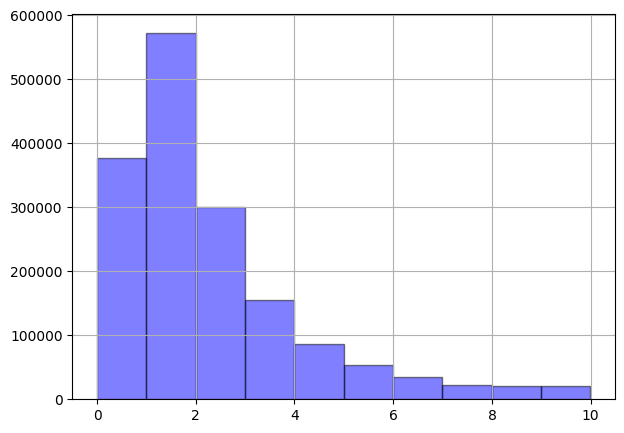

In [47]:
trips_distance = trips['trip_distance']
trips_distance_10 = trips_distance[trips_distance < 10]
_ = trips_distance_10.hist(color='blue', edgecolor='black', alpha=0.5, 
                           figsize=(7, 5))

* Note that the default 10 bins may not be the most suitable value.

* There are various approaches for determining the [number and the width of bins](https://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width).

* You can try out the various methods using the [`histogram_bin_edges()`](https://numpy.org/devdocs/reference/generated/numpy.histogram_bin_edges.html) function from NumPy.

* For instance, this is what we get using the Freedman–Diaconis's rule, where the width $h$ of each bin is determined by:

$$ h=2{\frac {\operatorname {IQR} (x)}{\sqrt[{3}]{n}}} $$

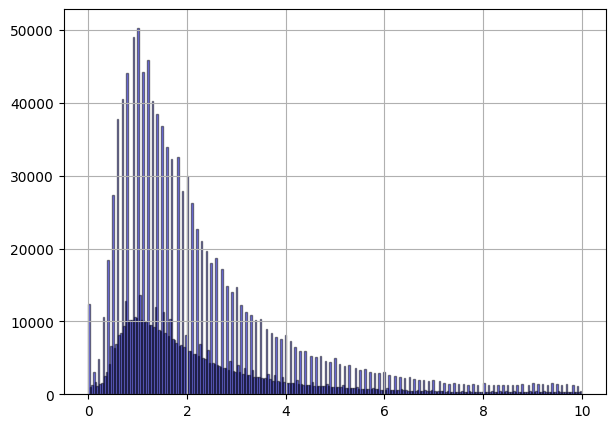

In [48]:
_ = trips_distance_10.hist(
    bins=np.histogram_bin_edges(trips_distance_10, bins='fd'),
    color='blue', edgecolor='black', alpha=0.5, figsize=(7, 5)
)

* This histogram shows the effect of rounding in a much more pronounced way than before!

* The peaks essentially appear on tenths of miles.

In [49]:
trips_distance_10.value_counts(
    bins=np.histogram_bin_edges(trips_distance_10, bins='fd')).iloc[:20]

(0.996, 1.028]    50320
(0.899, 0.932]    48969
(1.189, 1.221]    45935
(1.092, 1.124]    44294
(0.771, 0.803]    44091
(0.675, 0.707]    40513
(1.285, 1.317]    40314
(1.381, 1.413]    38443
(0.578, 0.61]     37783
(1.478, 1.51]     36872
(1.574, 1.606]    33929
(1.799, 1.831]    32500
(1.67, 1.702]     32233
(1.992, 2.024]    29990
(1.895, 1.927]    27893
(0.482, 0.514]    27360
(2.088, 2.12]     26236
(2.184, 2.216]    22676
(2.281, 2.313]    21016
(2.377, 2.409]    19658
Name: count, dtype: int64

# When Do New Yorkers Take Taxis?

* To tackle the question, we will, among other things, use the *group by* operation.

* The name from the SQL `GROUP BY` operation, which works as follows:

```sql
SELECT Column1, Column2, mean(Column3), sum(Column4)
FROM SomeTable
GROUP BY Column1, Column2
```

* Let's examine some data with two data columns of interest and two key columns.

In [50]:
df = pd.DataFrame({'key1': ['a', 'a', 'b', 'b', 'a'],
                   'key2': ['one', 'two', 'one', 'two', 'one'],
                   'data1': np.random.randn(5),
                   'data2': np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,-0.761943,0.157070
1,a,two,-0.493947,-1.309747
2,b,one,0.238058,-1.176143
3,b,two,-0.767621,1.426802
4,a,one,-0.223065,0.050219


* Let's group by `key1` and check the groups we get.

In [51]:
grouped = df.groupby('key1')

for name, group in grouped:
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one -0.761943  0.157070
1    a  two -0.493947 -1.309747
4    a  one -0.223065  0.050219
b
  key1 key2     data1     data2
2    b  one  0.238058 -1.176143
3    b  two -0.767621  1.426802


* We can now easily get an aggregate value per group, for instance, the mean.

* Note that column `key2` does not contain numerical data, so it cannot be used for the mean.

In [52]:
grouped[['data1', 'data2']].mean()

,data1,data2
key1,,
a,-0.492985,-0.367486
b,-0.264782,0.125330


* Now let's group by `key1` and `key2` and check the groups we get.

In [53]:
grouped = df.groupby(['key1', 'key2'])

for (k1, k2), group in grouped:
    print(k1, k2)
    print(group)

a one
  key1 key2     data1     data2
0    a  one -0.761943  0.157070
4    a  one -0.223065  0.050219
a two
  key1 key2     data1     data2
1    a  two -0.493947 -1.309747
b one
  key1 key2     data1     data2
2    b  one  0.238058 -1.176143
b two
  key1 key2     data1     data2
3    b  two -0.767621  1.426802


* Let's check the means again.

In [54]:
grouped.mean()

data1     data2
key1 key2                    
a    one  -0.492504  0.103644
     two  -0.493947 -1.309747
b    one   0.238058 -1.176143
     two  -0.767621  1.426802

# Group By and Restaurant Data

* As a more realistic example, let's examine restaurant tips data.

* The data set comes from Bryant, P. G. and Smith, M. A. (1995), Practical Data Analysis: Case Studies in Business Statistics, Richard D. Irwin Publishing, Homewood, IL.

In [55]:
tips = pd.read_csv("data/tips.csv")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


* We'll add the percentange of the bill that goes for tipping.

* By the way, we see how to add new columns to a `DataFrame`.

In [56]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


* We can now group the data by sex and smoker status.

In [57]:
grouped = tips.groupby(['sex', 'smoker'])

* And then we can compute the mean and the standard deviation per group.

In [58]:
grouped[['total_bill', 'tip', 'size', 'tip_pct']].agg(['mean', 'std'])

total_bill                 tip                size            \
                    mean       std      mean       std      mean       std   
sex    smoker                                                                
Female No      18.105185  7.286455  2.773519  1.128425  2.592593  1.073146   
       Yes     17.977879  9.189751  2.931515  1.219916  2.242424  0.613917   
Male   No      19.791237  8.726566  3.113402  1.489559  2.711340  0.989094   
       Yes     22.284500  9.911845  3.051167  1.500120  2.500000  0.892530   

                tip_pct            
                   mean       std  
sex    smoker                      
Female No      0.156921  0.036421  
       Yes     0.182150  0.071595  
Male   No      0.160669  0.041849  
       Yes     0.152771  0.090588

* To visualize the tips dataset and different groupings, we are going to use another visualisation library, seaborn.

* The simplest way to visualize it is to use a scatterplot.

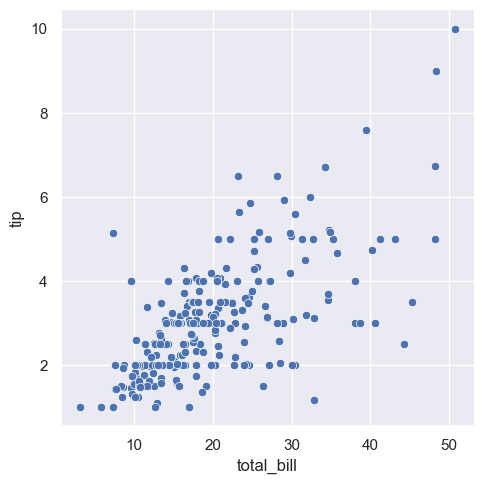

In [59]:
import seaborn as sns

sns.set(style="darkgrid")
_ = sns.relplot(x="total_bill", y="tip", data=tips)

* We can add another dimension to the plot by coloring the points according to a third variable. 

* In seaborn, this is referred to as using a "hue semantic", because the color of the point gains meaning.

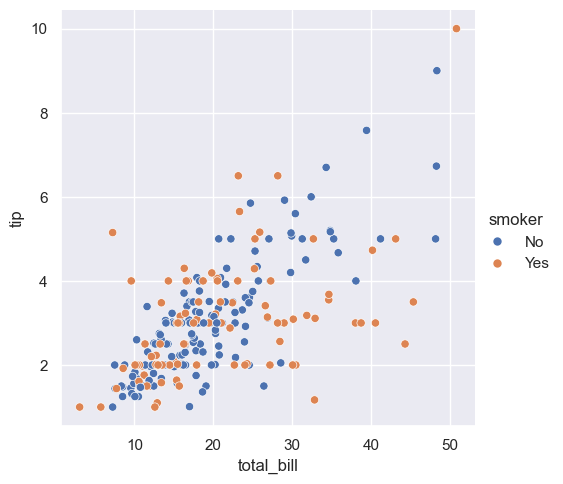

In [60]:
_ = sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)

* To emphasize the difference between the classes, and to improve accessibility, we can use a different marker style for each class:

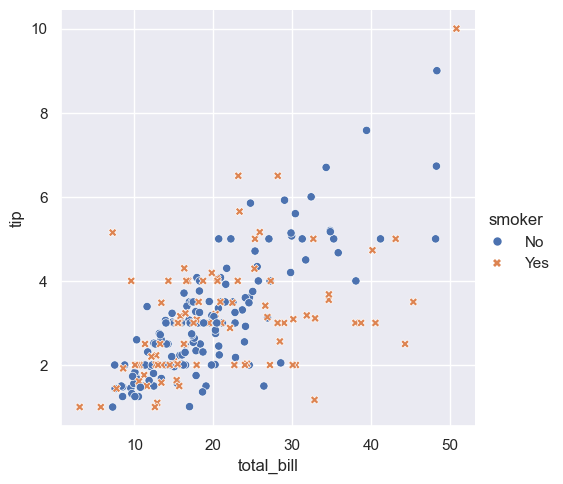

In [61]:
_ = sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker", data=tips)

* We can represent four variables by changing the hue and style of each point independently. 

* However, this should be done carefully, because the eye is much less sensitive to shape than to color.

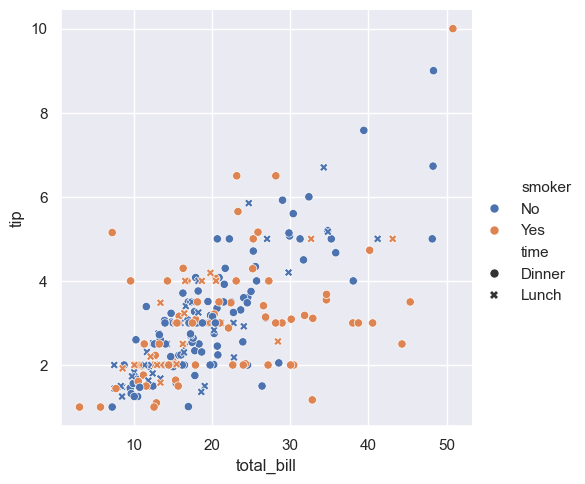

In [62]:
_ = sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips)

* In these examples, the hue semantic was categorical, so the default [qualitative palette](https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial) was applied. 

* If the hue semantic is numeric (specifically, if it can be cast to float), the default coloring switches to a sequential palette.


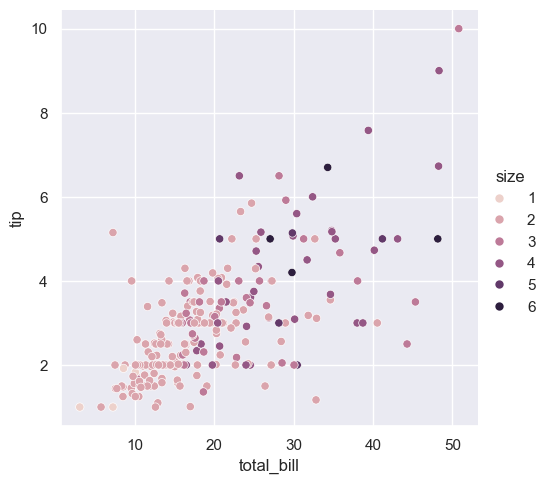

In [63]:
_ = sns.relplot(x="total_bill", y="tip", hue="size", data=tips)

* Unlike with `matplotlib.pyplot.scatter()`, the literal value of the variable is not used to pick the area of the point. 

* Instead, the range of values in data units is normalized into a range in area units. This range can be customized.

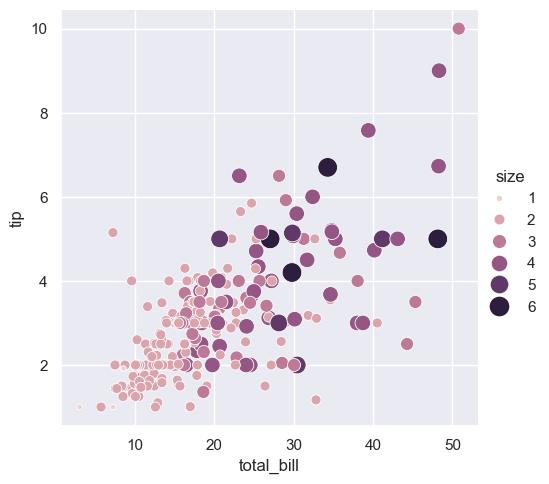

In [64]:
_ = sns.relplot(x="total_bill", y="tip", hue="size", size="size", sizes=(15, 200), data=tips)

* If we want to show how a relationship between two variables depends on more than one other variable, we can use *facets*.

* In particular, we create subplots arranged in row and columns, where rows and columns vary by a variable each.

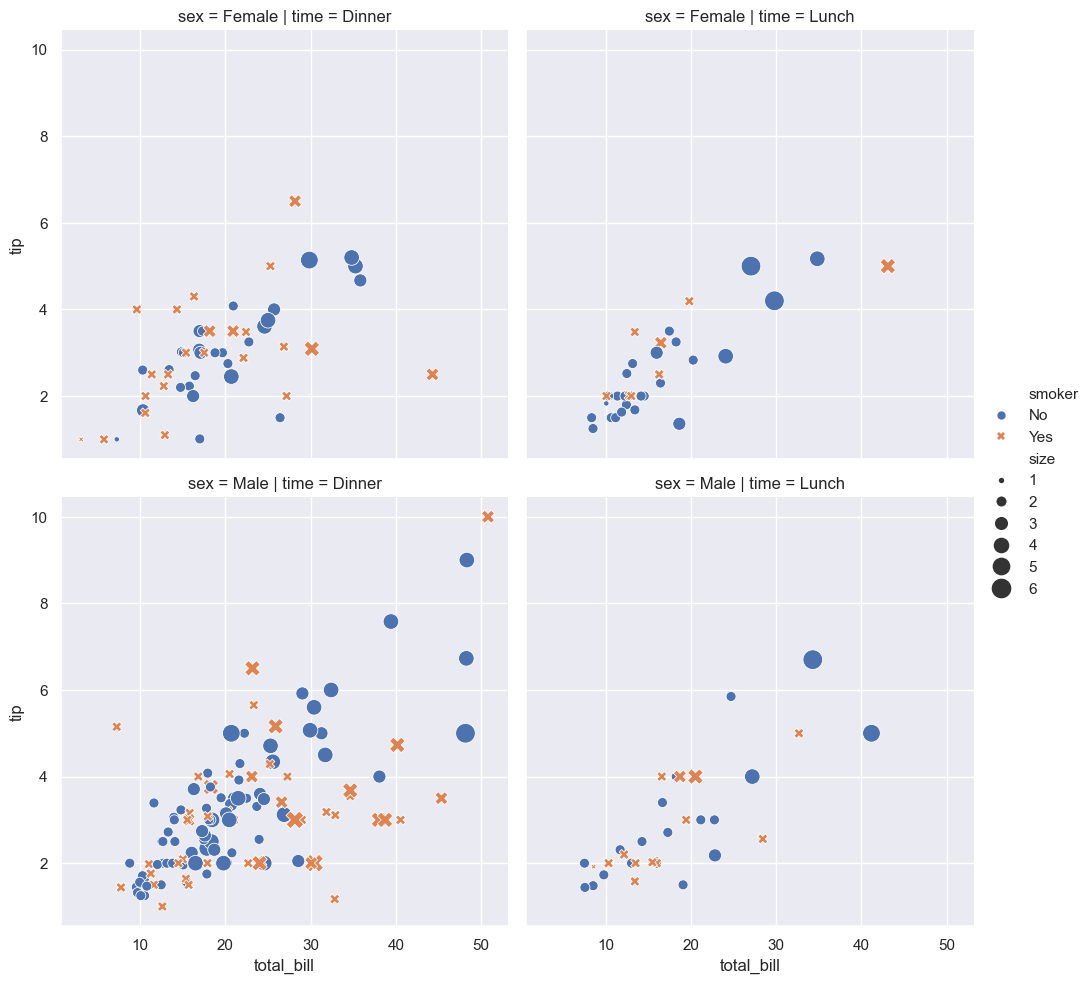

In [65]:
_ = sns.relplot(x="total_bill", y="tip", col="time", row="sex",
                hue="smoker", style="smoker", size="size",
                sizes=(15, 200),
                data=tips)

* Let's return to the taxi rides data set.

* There were two columns with date and times data:
  * `pickup_datetime`
  * `dropoff_datetime`
  
* Let's examine `pickup_datetime`.

In [66]:
trips.pickup_datetime

0          2013-10-04 20:20:00
1          2013-09-27 14:16:04
2          2013-07-18 13:24:37
3          2013-06-25 12:12:00
4          2013-04-19 05:28:00
                  ...         
1731792    2013-08-02 03:34:00
1731793    2013-02-21 12:44:00
1731794    2013-02-16 17:24:00
1731795    2013-05-24 10:29:16
1731796    2013-03-15 14:42:10
Name: pickup_datetime, Length: 1726326, dtype: object

* We may observe that the type (`dtype`) of the column (`Series`) `pickup_datetime` is `object`.

* But we want to handle it as date and time.

* To do that, we should specify it when reading in the `DataFrame`.

In [67]:
trips = pd.read_csv("data/nyc_taxi_trip_data_sample.csv", 
                    parse_dates=['pickup_datetime', 'dropoff_datetime'])
trips

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,037CB433AB5895649F7A9EF37F767EF1,F57FA13A6A82FE2F40D9DB0193DE0FEE,VTS,1,NaN,2013-10-04 20:20:00,2013-10-04 20:42:00,1,1320,4.05,-73.990089,40.723377,-73.941559,40.707790
1,E05E952B2DA14C7E9F1D7DEB80667739,11A3989B7BABB288FA3FA233E348C450,CMT,1,N,2013-09-27 14:16:04,2013-09-27 14:37:17,1,1273,2.10,-73.960022,40.710678,-73.994324,40.722858
2,51B267141807D0261EEB1844D2A78087,9DE60DFD683336F899D5BB448CE7CB09,CMT,1,N,2013-07-18 13:24:37,2013-07-18 13:29:27,3,290,0.90,-73.970634,40.760410,-73.960213,40.770241
3,76AC5C0F44D07BA5A2291F19E730B0B9,2348E03BB8227595281D9D6B38E45B38,VTS,1,NaN,2013-06-25 12:12:00,2013-06-25 12:28:00,2,960,1.28,-73.992661,40.752766,-73.975952,40.751781
4,739323AC15DADABE4B54561CB3330C53,9387A0902D7B1B4597802BE63AE7C34F,VTS,1,NaN,2013-04-19 05:28:00,2013-04-19 05:38:00,1,600,2.22,-73.999107,40.727924,-73.974869,40.741886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731792,5DAE4FE51457F5B4D4950D00A0AD4394,B76DC9DC874EB9D71CC04ABC0D9AAC6A,CMT,1,N,2013-08-02 03:34:00,2013-08-02 03:51:47,2,1067,6.00,-73.995766,40.764359,-73.920052,40.775574
1731793,3C16CFAD2B12F3508F7211C37F8F8B8F,A36B62F2B6D1D6C289519810E66EAAB9,VTS,1,NaN,2013-02-21 12:44:00,2013-02-21 13:11:00,6,1620,3.94,0.000000,0.000000,0.000000,0.000000
1731794,23E5F1FDC96168E865BF7B4427C0163B,E7D75D6D6F2DBD7D25578F02991193D9,VTS,1,NaN,2013-02-16 17:24:00,2013-02-16 17:30:00,3,360,2.15,-73.991554,40.726940,-73.971642,40.751362
1731795,FE44D1131D86D515C88D5296598DD35A,015615BB1B66BA269602ED1A867271FA,CMT,1,N,2013-05-24 10:29:16,2013-05-24 10:44:39,1,923,7.20,-73.865715,40.771168,-73.809006,40.700127


* Let's see now the type of the `pickup_datetime` column.

* It is of type `datetime64[ns]`

In [68]:
trips.pickup_datetime

0         2013-10-04 20:20:00
1         2013-09-27 14:16:04
2         2013-07-18 13:24:37
3         2013-06-25 12:12:00
4         2013-04-19 05:28:00
                  ...        
1731792   2013-08-02 03:34:00
1731793   2013-02-21 12:44:00
1731794   2013-02-16 17:24:00
1731795   2013-05-24 10:29:16
1731796   2013-03-15 14:42:10
Name: pickup_datetime, Length: 1731797, dtype: datetime64[ns]

* Once a column is of type `datetime`, we can use the `.dt` suffix to apply many different date, time, and calendar-related methods.

* Warning: *we never do any calendric calculations "by hand"*. Only with libraries!

* pandas provides many methods to operate on dates and times. Common operations include:

     * getting the day, day of week, hour, or any other quantity from dates
     
     * selecting ranges of dates
     
     * computing time ranges
     
     * dealing with different time zones

* Here is how to get the day of the week of the taxi trips (Monday = 0, Sunday = 6).

In [69]:
trips.pickup_datetime.dt.dayofweek[::200000]

0          4
200000     4
400000     4
600000     1
800000     1
1000000    0
1200000    3
1400000    4
1600000    6
Name: pickup_datetime, dtype: int32

* As another example, let's find all night rides that finished the next day.

* Using `dt.day` we get the day in the month (starting from 1).

In [70]:
day_p = trips.pickup_datetime.dt.day
day_d = trips.dropoff_datetime.dt.day
selection = (day_p != day_d)
print(len(trips.loc[selection]))
trips.loc[selection].head(3)

15946


,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
60,E9FA616510F27097982DA2CE4E767FCD,175708CACECE12DEC30922D8D9313620,CMT,1,N,2013-12-18 23:59:18,2013-12-19 00:04:21,1,302,1.00,0.000000,0.000000,-73.968422,40.766537
266,419C8B9879124668807EEAE9DCE145C7,92BD7595C547C097D97A3C277C8E655C,VTS,1,NaN,2013-03-06 23:54:00,2013-03-07 00:00:00,1,360,1.47,-73.980812,40.675774,-74.000526,40.680405
312,7EE08BC10C051AA85633814336252B75,96C0C1097FD4B2264CA9E84FE990E11B,VTS,1,NaN,2013-07-17 23:57:00,2013-07-18 00:04:00,2,420,1.14,-73.991272,40.756207,-73.978310,40.754292


* Now, let's count the number of taxi rides per week.

* To do that, we'll first group the taxi rides by week.

In [71]:
weekly = trips.groupby(trips.pickup_datetime.dt.isocalendar().week)
len(weekly)

52

* The `groupby()` method returned an object with one group for each week of the year.

* The `size()` method returns the number of rows in each group.

In [72]:
y = weekly.size()
y.head(3)

week
1    35125
2    32415
3    34478
dtype: int64

* We can immediately create a diagram with that data.

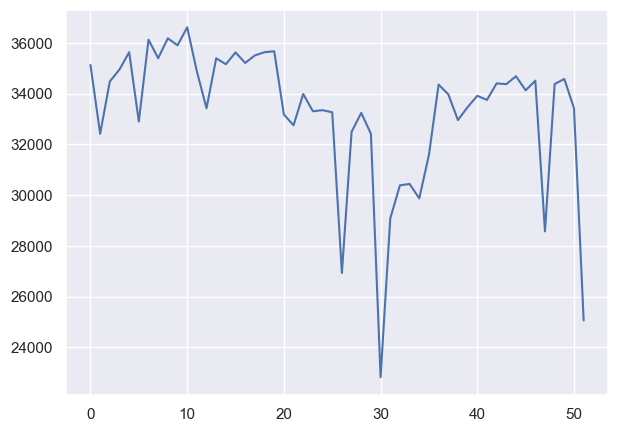

In [73]:
_ = pd.Series(y.to_numpy()).plot(figsize=(7, 5))

* The diagram is correct, but there is a problem.

* On the horizontal axis we have the week number.

* That is not very convenient, because we may not remember when, for instance, is week 13 in the year.

* To solve the problem, in the `x` axis we'll put the first day that we have a ride in each week.

In [74]:
x = weekly.pickup_datetime.min()
x.loc[:3]

week
1   2013-01-01 00:00:00
2   2013-01-07 00:00:29
3   2013-01-14 00:00:00
Name: pickup_datetime, dtype: datetime64[ns]

* We may observe that the first week of the year contains six days instead of seven.

* This happens because the first week of 2013 started on a Tuesday.

In [75]:
x.loc[1].day_name()

'Tuesday'

* The last week of the year did have seven days.

In [76]:
print(x[-3:])
weekly.pickup_datetime.max().iloc[-1]

week
50   2013-12-09
51   2013-12-16
52   2013-12-23
Name: pickup_datetime, dtype: datetime64[ns]


Timestamp('2013-12-29 23:59:19')

* Now we can create our plot.

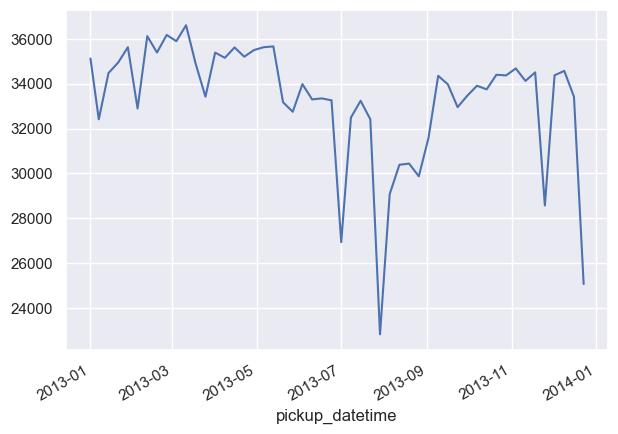

In [77]:
_ = pd.Series(y.to_numpy(), index=x).plot(figsize=(7, 5))

* If we want to see how busy taxis are on a day of week basis?

* If suffixes to group by day.

In [78]:
dayofweek_rides = trips.groupby(trips.pickup_datetime.dt.dayofweek)
len(dayofweek_rides)

7

* And then we count the trips per group:

In [79]:
day_of_week_rides_num = dayofweek_rides.size()
day_of_week_rides_num

pickup_datetime
0    224342
1    246768
2    249750
3    255900
4    263773
5    262127
6    229137
dtype: int64

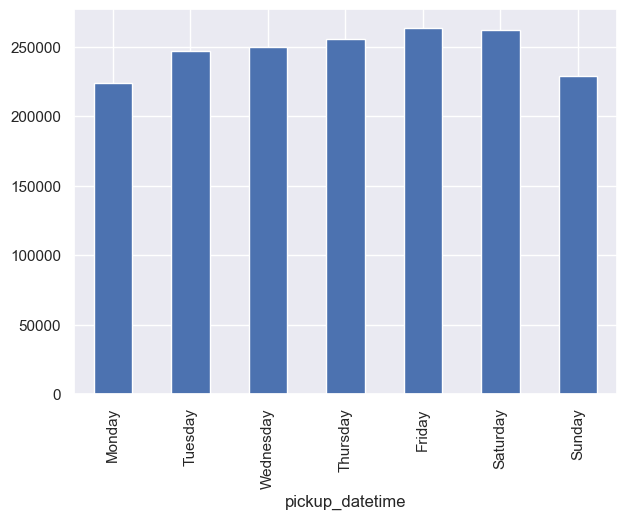

In [80]:
day_of_week_rides_num.plot(kind='bar', figsize=(7, 5))
_ = plt.gca().set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 
                               'Thursday', 'Friday', 'Saturday', 'Sunday'])

* Similarly, on a hourly basis.

In [81]:
hourly_rides = trips.groupby(trips.pickup_datetime.dt.hour)
len(hourly_rides)

24

* We count each group:

In [82]:
hourly_rides_num = hourly_rides.size()
hourly_rides_num

pickup_datetime
0      69279
1      50967
2      38098
3      27537
4      20058
5      17475
6      35918
7      62327
8      77968
9      80253
10     78149
11     80642
12     85324
13     84133
14     86588
15     83057
16     69029
17     83954
18    104198
19    108802
20    103391
21    100562
22     97859
23     86229
dtype: int64

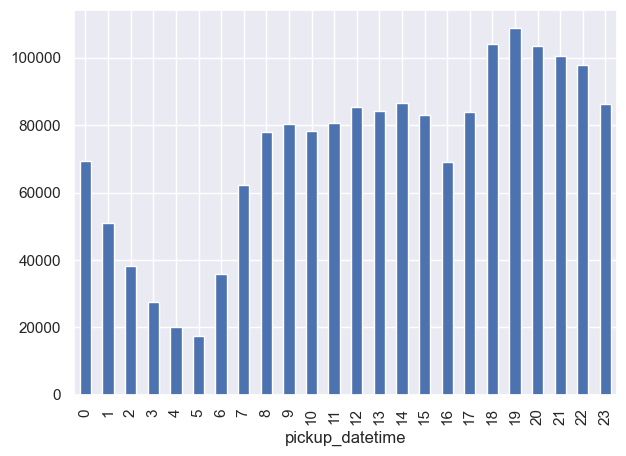

In [83]:
_ = hourly_rides_num.plot.bar(figsize=(7, 5))

# Being and Nothingness

* We will use a dataset with house prices from California.

* The data come from Pace, R. Kelley και Ronald Barry, Sparse Spatial Autoregressions, Statistics and Probability Letters, 33 (1997) 291-297.

In [84]:
cal_housing = pd.read_csv('cal_housing.csv')
cal_housing

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


* The data are complete, without any missing values.

* Unfortunately that's far from the norm.

* Most times, our data will have missing values.

* When a record has a missing value, that value is represented as `NaN` (Not a Number).

* So we'll downgrade our data by introducing gaps into them.

* We'll delete data from 75% of the rows of our `DataFrame` (as shown
  in [the
  scikit-learn documentation](https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html)).

In [85]:
n_samples, n_features = cal_housing.shape

# Add missing values in 75% of the lines
missing_rate = 0.75
n_missing_samples = int(n_samples * missing_rate)
n_missing_samples

15480

* We make an array with as many `False` as the rows of `cal_housing` `DataFrame`.

In [86]:
missing_samples = np.zeros(n_samples, dtype=bool)
print(missing_samples.shape, missing_samples)

(20640,) [False False False ... False False False]


* We'll convert 75% of the items to `True`.

In [87]:
missing_samples[:n_missing_samples] = True

* We shuffle the array, so that `True` and `False` are mixed.

In [88]:
rng = np.random.default_rng(42)
rng.shuffle(missing_samples)

* For each of the rows in which we will delete data, we pick a column
  in random (that is where the data will be deleted).

In [89]:
missing_features = rng.integers(0, n_features, n_missing_samples)
print(missing_features.shape, missing_features)

(15480,) [4 3 1 ... 7 2 1]


* We downgrade `cal_housing`, putting `np.nan` in the randomly
  selected rows and columns.

In [90]:
cal_housing.to_numpy()[missing_samples, missing_features] = np.nan
cal_housing

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,NaN,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,NaN,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,NaN,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,NaN,5.6431,341300.0
4,NaN,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,NaN,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,NaN,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,NaN,92300.0
20638,-121.32,39.43,NaN,1860.0,409.0,741.0,349.0,1.8672,84700.0


* The most essential thing we can do with missing data is to detect
  that they are missing.

* If we want to check whether some data do not exist, we use the
  `isna()` method.

In [91]:
cal_housing['totalRooms'].isna()

0        False
1         True
2        False
3        False
4        False
         ...  
20635    False
20636     True
20637    False
20638    False
20639    False
Name: totalRooms, Length: 20640, dtype: bool

* The `isnull()` method is synonym for `isna()`.

In [92]:
cal_housing['totalRooms'].isnull()

0        False
1         True
2        False
3        False
4        False
         ...  
20635    False
20636     True
20637    False
20638    False
20639    False
Name: totalRooms, Length: 20640, dtype: bool

* If we want to check that some data exist, we can use the `notna()` method.

In [93]:
cal_housing['latitude'].notna()

0         True
1         True
2        False
3         True
4         True
         ...  
20635     True
20636     True
20637     True
20638     True
20639    False
Name: latitude, Length: 20640, dtype: bool

* The `notnull()` method is a synonym for `notna()`.

In [94]:
cal_housing['latitude'].notnull()

0         True
1         True
2        False
3         True
4         True
         ...  
20635     True
20636     True
20637     True
20638     True
20639    False
Name: latitude, Length: 20640, dtype: bool

* If we want to count how many data are missing, we can sum the result
  of `isna()`, as when summing the `True` values become 1 and the
  `False` values become 0.

In [95]:
cal_housing['latitude'].isna().sum()

np.int64(1680)

* Using these methods we can filter out missing data.

In [96]:
cal_housing[cal_housing['medianHouseValue'].notna()]

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,NaN,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,NaN,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,NaN,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,NaN,5.6431,341300.0
4,NaN,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,NaN,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,NaN,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,NaN,92300.0
20638,-121.32,39.43,NaN,1860.0,409.0,741.0,349.0,1.8672,84700.0


* Another way is to throw away the rows with missing data using `dropna()`.

In [97]:
cal_housing.dropna()

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0
11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0
17,-122.27,37.85,52.0,1228.0,293.0,648.0,303.0,2.1202,155500.0
20,-122.27,37.85,40.0,751.0,184.0,409.0,166.0,1.3578,147500.0
21,-122.27,37.85,42.0,1639.0,367.0,929.0,366.0,1.7135,159800.0
...,...,...,...,...,...,...,...,...,...
20617,-121.53,39.06,20.0,561.0,109.0,308.0,114.0,3.3021,70800.0
20620,-121.48,39.05,40.0,198.0,41.0,151.0,48.0,4.5625,100000.0
20623,-121.37,39.03,32.0,1158.0,244.0,598.0,227.0,2.8235,65500.0
20627,-121.32,39.13,5.0,358.0,65.0,169.0,59.0,3.0000,162500.0


* A problem with this approach may be that perhaps we throw out a
  large anount of our data.

* We may in fact prefer to remove the rows only where there are
  missing data in particular columns.

In [98]:
cal_housing.dropna(subset=['medianHouseValue', 'medianIncome'])

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,NaN,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,NaN,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,NaN,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,NaN,5.6431,341300.0
4,NaN,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20633,-121.53,39.19,27.0,2080.0,412.0,1082.0,NaN,2.5495,98300.0
20635,NaN,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,NaN,150.0,356.0,114.0,2.5568,77100.0
20638,-121.32,39.43,NaN,1860.0,409.0,741.0,349.0,1.8672,84700.0


* If we do not want to remove data, we can change our data by putting
  a value where data are missing, using `fillna()`.

In [99]:
cal_housing.fillna(0)

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,0.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,0.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,0.00,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,0.0,5.6431,341300.0
4,0.00,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,0.00,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,0.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,0.0000,92300.0
20638,-121.32,39.43,0.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


* We can choose a subset of the columns on which to apply `fillna()`.

In [100]:
cal_housing[['medianIncome', 'medianHouseValue']].fillna(0)

,medianIncome,medianHouseValue
0,8.3252,452600.0
1,8.3014,358500.0
2,7.2574,352100.0
3,5.6431,341300.0
4,3.8462,342200.0
...,...,...
20635,1.5603,78100.0
20636,2.5568,77100.0
20637,0.0000,92300.0
20638,1.8672,84700.0


* We may wish to fill in the values in a slightly more intelligent way.

* For instance, instead of a preset value, we can use the mean, or
  some other calculated value.

In [101]:
cal_housing.fillna(cal_housing.mean())

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.230000,37.880000,41.000000,880.000000,539.232767,322.0,126.000,8.325200,452600.0
1,-122.220000,37.860000,21.000000,2641.457729,1106.000000,2401.0,1138.000,8.301400,358500.0
2,-122.240000,35.625127,52.000000,1467.000000,190.000000,496.0,177.000,7.257400,352100.0
3,-122.250000,37.850000,52.000000,1274.000000,235.000000,558.0,499.158,5.643100,341300.0
4,-119.574345,37.850000,52.000000,1627.000000,280.000000,565.0,259.000,3.846200,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-119.574345,39.480000,25.000000,1665.000000,374.000000,845.0,330.000,1.560300,78100.0
20636,-121.210000,39.490000,18.000000,2641.457729,150.000000,356.0,114.000,2.556800,77100.0
20637,-121.220000,39.430000,17.000000,2254.000000,485.000000,1007.0,433.000,3.870723,92300.0
20638,-121.320000,39.430000,28.662049,1860.000000,409.000000,741.0,349.000,1.867200,84700.0


* If we do not want that on the whole `DataFrame`, we can again choose
  a subset of the columns.

In [102]:
cal_housing.fillna(cal_housing.mean()["medianIncome":"medianHouseValue"])

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,NaN,322.0,126.0,8.325200,452600.0
1,-122.22,37.86,21.0,NaN,1106.0,2401.0,1138.0,8.301400,358500.0
2,-122.24,NaN,52.0,1467.0,190.0,496.0,177.0,7.257400,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,NaN,5.643100,341300.0
4,NaN,37.85,52.0,1627.0,280.0,565.0,259.0,3.846200,342200.0
...,...,...,...,...,...,...,...,...,...
20635,NaN,39.48,25.0,1665.0,374.0,845.0,330.0,1.560300,78100.0
20636,-121.21,39.49,18.0,NaN,150.0,356.0,114.0,2.556800,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,3.870723,92300.0
20638,-121.32,39.43,NaN,1860.0,409.0,741.0,349.0,1.867200,84700.0


* We can also apply other filling methods with  `fillna()`.

* It is more convenient to see them with another, smaller `DataFrame`.

In [103]:
df = pd.DataFrame(
    np.random.randn(5, 3),
    columns=["a", "b", "c"],
)
df

,a,b,c
0,0.583521,0.153395,0.245122
1,0.001778,0.517592,0.033460
2,0.725280,0.012126,1.207311
3,-1.154555,-0.993071,0.204361
4,-0.987803,-0.117715,0.673409


* We will remove data by using a mask with `NaN` values.

In [104]:
np.random.seed(0)
nan_mask = np.where(np.random.randint(low=0, high=1+1, size=(5,3)) == 1, 0, np.nan)
nan_mask

array([[nan,  0.,  0.],
       [nan,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0., nan],
       [nan,  0., nan]])

* We add the mask to our `DataFrame`.

* By the way, we see that `NaN`s propagate (unless the documentation
  says otherwise).

In [105]:
df

,a,b,c
0,0.583521,0.153395,0.245122
1,0.001778,0.517592,0.033460
2,0.725280,0.012126,1.207311
3,-1.154555,-0.993071,0.204361
4,-0.987803,-0.117715,0.673409


In [106]:
df = df + nan_mask
df

,a,b,c
0,NaN,0.153395,0.245122
1,NaN,0.517592,0.033460
2,0.725280,0.012126,1.207311
3,-1.154555,-0.993071,NaN
4,NaN,-0.117715,NaN


* Let's confirm again that `NaN`s propagate.

In [107]:
df

,a,b,c
0,NaN,0.153395,0.245122
1,NaN,0.517592,0.033460
2,0.725280,0.012126,1.207311
3,-1.154555,-0.993071,NaN
4,NaN,-0.117715,NaN


In [108]:
df.a + df.b

0         NaN
1         NaN
2    0.737406
3   -2.147626
4         NaN
dtype: float64

* If we use `fillna(method='pad')`, the missing data are filled from
  the last preceding existing data in the column.

In [109]:
df

,a,b,c
0,NaN,0.153395,0.245122
1,NaN,0.517592,0.033460
2,0.725280,0.012126,1.207311
3,-1.154555,-0.993071,NaN
4,NaN,-0.117715,NaN


In [110]:
df.fillna(method='pad')

,a,b,c
0,NaN,0.153395,0.245122
1,NaN,0.517592,0.033460
2,0.725280,0.012126,1.207311
3,-1.154555,-0.993071,1.207311
4,-1.154555,-0.117715,1.207311


* We can do the same with `fillna(method='ffill')` (forward fill).

In [111]:
df

,a,b,c
0,NaN,0.153395,0.245122
1,NaN,0.517592,0.033460
2,0.725280,0.012126,1.207311
3,-1.154555,-0.993071,NaN
4,NaN,-0.117715,NaN


In [112]:
df.fillna(method='ffill')

,a,b,c
0,NaN,0.153395,0.245122
1,NaN,0.517592,0.033460
2,0.725280,0.012126,1.207311
3,-1.154555,-0.993071,1.207311
4,-1.154555,-0.117715,1.207311


* If we want to fill in reverse order, using the first piece of data that
  follows in the column, we use `fillna(method='bfill')` (backfill).

In [113]:
df

,a,b,c
0,NaN,0.153395,0.245122
1,NaN,0.517592,0.033460
2,0.725280,0.012126,1.207311
3,-1.154555,-0.993071,NaN
4,NaN,-0.117715,NaN


In [114]:
df.fillna(method='bfill')

,a,b,c
0,0.725280,0.153395,0.245122
1,0.725280,0.517592,0.033460
2,0.725280,0.012126,1.207311
3,-1.154555,-0.993071,NaN
4,NaN,-0.117715,NaN


* We can do the same with `fillna(method='backfill')`.

In [115]:
df

,a,b,c
0,NaN,0.153395,0.245122
1,NaN,0.517592,0.033460
2,0.725280,0.012126,1.207311
3,-1.154555,-0.993071,NaN
4,NaN,-0.117715,NaN


In [116]:
df.fillna(method='backfill')

,a,b,c
0,0.725280,0.153395,0.245122
1,0.725280,0.517592,0.033460
2,0.725280,0.012126,1.207311
3,-1.154555,-0.993071,NaN
4,NaN,-0.117715,NaN


* Yet another way to fill missing values is to use *interpolation*.

* This can be particularly useful when the values can be put in a
  sequence, as in *time series*.

* The pandas library uses various interpolation methods. We will use
  the simplest one, called *linear interpolation*.

* To see interpolation in action, we will create artificial data that
  simulate a *random walk*.

In [117]:
steps = np.random.randint(-1, 1+1, size=365)
steps_sum = steps.cumsum()

ts = pd.Series(data=steps_sum,
               index=pd.date_range(start='2021-01-01', 
                                   end='2021-12-31', 
                                   freq='D'))
ts

2021-01-01    -1
2021-01-02    -2
2021-01-03    -3
2021-01-04    -2
2021-01-05    -2
              ..
2021-12-27   -15
2021-12-28   -14
2021-12-29   -15
2021-12-30   -14
2021-12-31   -15
Freq: D, Length: 365, dtype: int64

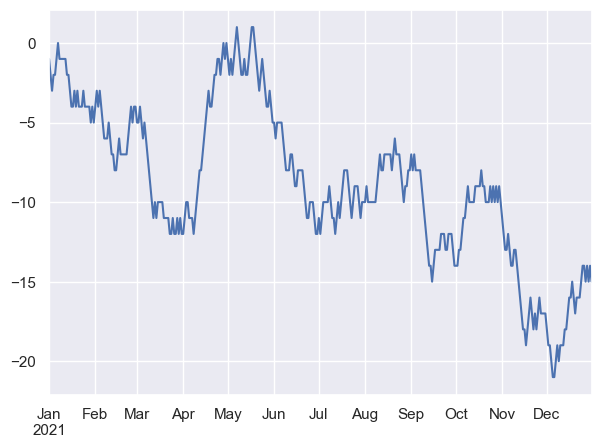

In [118]:
_ = ts.plot(figsize=(7, 5))

* We will remove at random some data (about half).

In [119]:
nan_mask = np.where(np.random.randint(low=0, high=1+1, size=(365)) == 1, 0, np.nan)
ts = ts + nan_mask
print(ts.isna().sum())
ts

179


2021-01-01    -1.0
2021-01-02     NaN
2021-01-03    -3.0
2021-01-04     NaN
2021-01-05    -2.0
              ... 
2021-12-27     NaN
2021-12-28     NaN
2021-12-29   -15.0
2021-12-30     NaN
2021-12-31     NaN
Freq: D, Length: 365, dtype: float64

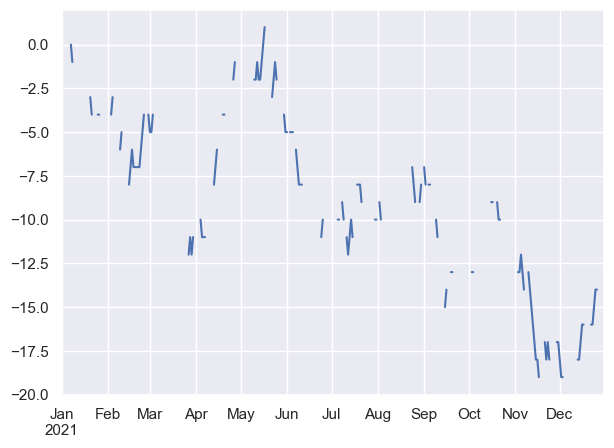

In [120]:
_ = ts.plot(figsize=(7, 5))

* This is what we get with linear interpolation via `interpolate()`.

In [121]:
ts = ts.interpolate()
ts

2021-01-01    -1.000000
2021-01-02    -2.000000
2021-01-03    -3.000000
2021-01-04    -2.500000
2021-01-05    -2.000000
                ...    
2021-12-27   -14.333333
2021-12-28   -14.666667
2021-12-29   -15.000000
2021-12-30   -15.000000
2021-12-31   -15.000000
Freq: D, Length: 365, dtype: float64

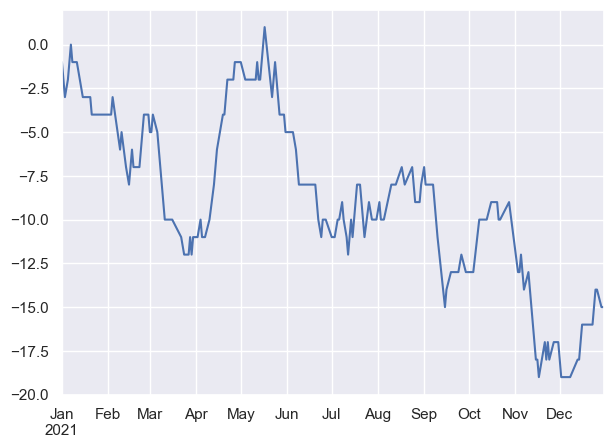

In [122]:
_ = ts.plot(figsize=(7, 5))

* Additional techniques for handling missing data are provided by the
  [scikit-learn library](https://scikit-learn.org/stable/), using
  *imputation* techniques.

* The simplest imputation techniques are provided by `SimpleImputer`:

  * `mean`

  * `median`

  * `most_frequent`

  * `constant`

In [123]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=0)

* Let's return to the California Housing dataset.

In [124]:
cal_housing

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.88,41.0,880.0,NaN,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,NaN,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,NaN,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,NaN,5.6431,341300.0
4,NaN,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,NaN,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,NaN,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,NaN,92300.0
20638,-121.32,39.43,NaN,1860.0,409.0,741.0,349.0,1.8672,84700.0


* To use an imputer with scikit-learn, our data must be in the form of a  two-dimensional matrix.

* We can do that using `reshape(-1, 1)`, which means "change the
  schema of our data to have one column and as many rows as possible".

In [125]:
cal_housing['totalBedrooms'].to_numpy().reshape(-1, 1)

array([[  nan],
       [1106.],
       [ 190.],
       ...,
       [ 485.],
       [ 409.],
       [ 616.]])

* We call `fit_transform()` on our imputer:

In [126]:
imputer.fit_transform(cal_housing['totalBedrooms'].to_numpy().reshape(-1, 1))

array([[   0.],
       [1106.],
       [ 190.],
       ...,
       [ 485.],
       [ 409.],
       [ 616.]])

* Instead of using a fixed value, let's now impute using the most frequent value.

* It may also be useful to get, by specifying `add_indicator=True`,
  one additional column with values `1` and `0` that indicate whether
  a value was imputed in this row.

In [127]:
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent", add_indicator=True)
imputer.fit_transform(cal_housing['totalBedrooms'].to_numpy().reshape(-1, 1))

array([[2.800e+02, 1.000e+00],
       [1.106e+03, 0.000e+00],
       [1.900e+02, 0.000e+00],
       ...,
       [4.850e+02, 0.000e+00],
       [4.090e+02, 0.000e+00],
       [6.160e+02, 0.000e+00]])

* scikit-learn offers yet other more advanced imputers:

  * `KNNImputer`
  
  * `IterativeImputer`

* The `KNNImputer` finds missing values by using the mean values from the nearest neighbors.

In [128]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3, weights="uniform")
knn_imputed = pd.DataFrame(imputer.fit_transform(cal_housing), 
                           columns=cal_housing.columns)
knn_imputed

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.23,37.880000,41.0,880.0,158.333333,322.0,126.000000,8.325200,452600.0
1,-122.22,37.860000,21.0,4963.0,1106.000000,2401.0,1138.000000,8.301400,358500.0
2,-122.24,34.960000,52.0,1467.0,190.000000,496.0,177.000000,7.257400,352100.0
3,-122.25,37.850000,52.0,1274.0,235.000000,558.0,243.333333,5.643100,341300.0
4,-120.56,37.850000,52.0,1627.0,280.000000,565.0,259.000000,3.846200,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-120.18,39.480000,25.0,1665.0,374.000000,845.0,330.000000,1.560300,78100.0
20636,-121.21,39.490000,18.0,702.0,150.000000,356.0,114.000000,2.556800,77100.0
20637,-121.22,39.430000,17.0,2254.0,485.000000,1007.0,433.000000,3.640867,92300.0
20638,-121.32,39.430000,47.0,1860.0,409.000000,741.0,349.000000,1.867200,84700.0


* The `IterativeImputer` fimds missing values by modelling the missing value as a function of the other values in the sample.

In [129]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=0)
iter_imputed = pd.DataFrame(imputer.fit_transform(cal_housing),
                            columns=cal_housing.columns)
iter_imputed

,longitude,latitude,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,-122.230000,37.880000,41.000000,880.000000,64.014054,322.0,126.000000,8.325200,452600.0
1,-122.220000,37.860000,21.000000,6356.181316,1106.000000,2401.0,1138.000000,8.301400,358500.0
2,-122.240000,37.716724,52.000000,1467.000000,190.000000,496.0,177.000000,7.257400,352100.0
3,-122.250000,37.850000,52.000000,1274.000000,235.000000,558.0,247.353286,5.643100,341300.0
4,-122.249086,37.850000,52.000000,1627.000000,280.000000,565.0,259.000000,3.846200,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-122.560659,39.480000,25.000000,1665.000000,374.000000,845.0,330.000000,1.560300,78100.0
20636,-121.210000,39.490000,18.000000,892.898003,150.000000,356.0,114.000000,2.556800,77100.0
20637,-121.220000,39.430000,17.000000,2254.000000,485.000000,1007.0,433.000000,2.872225,92300.0
20638,-121.320000,39.430000,25.425241,1860.000000,409.000000,741.0,349.000000,1.867200,84700.0


* Be careful! Handling missing values is not really a technical problem,

* As we see, there are plently of tools to deal with them.

* The difficult part is operational. Do we want to delete data, or to fill in the gaps? If we want to fill in the gaps, what values are we going to use?

* If really is spotty, we must make sure that by filling it in we do not alter reality.

# Deleting and Popping

* If we want to delete a column, we can use `del()`.

In [130]:
df = pd.DataFrame([('falcon', 'Falconidae', 'Aves', 389.0),
                   ('parrot', 'Psittacopasserae', 'Aves', 24.0),
                   ('lion', 'Felidae', 'Mammalia', 80.5),
                   ('chimpanzee','Hominidae', 'Mammalia', np.nan)],
                  columns=('name', 'family', 'class', 'max_speed'))
df

,name,family,class,max_speed
0,falcon,Falconidae,Aves,389.0
1,parrot,Psittacopasserae,Aves,24.0
2,lion,Felidae,Mammalia,80.5
3,chimpanzee,Hominidae,Mammalia,NaN


In [131]:
del df['class']
df

,name,family,max_speed
0,falcon,Falconidae,389.0
1,parrot,Psittacopasserae,24.0
2,lion,Felidae,80.5
3,chimpanzee,Hominidae,NaN


* If we want to delete and column and save it as a series, we can use `pop()`:

In [132]:
family = df.pop('family')
family

0          Falconidae
1    Psittacopasserae
2             Felidae
3           Hominidae
Name: family, dtype: object

In [133]:
df

,name,max_speed
0,falcon,389.0
1,parrot,24.0
2,lion,80.5
3,chimpanzee,NaN


# Regexes

* Regular expressions (REs, regexes) are a mechanism with which we can describe strings.

* In this way, we can search for strings that have a certain pattern, instead of being constrained to look for specific strings.

* For instance, suppose that instead of looking for a particular phone number in some data we are looking for all phone numbers in them. How will we do that?

* A regular expression consists of characters.

* Most characters match themselves.

  * The regular expression `test` matches string `test`. 
  
  * The regular expression `banana` matches string `banana`.

* But there are exceptions (and that's where things get interesting).

* Some characters are *metacharacters*, and they don't match themselves. 

* They mark an event, or some match different from the character.

* The metacharacters are the following:

  `. ^ $ * + ? { } [ ] \ | ( )`

* Metacharacters `[` and `]` are used to define a *character class*, a set of characters that we want to match.

* For example, the regular expression `[abc]` matches `a`, `b`, or `c`. 

* The regular expression `[fgm]ood` matches the words `food`, `good`, `mood`.

* We can define a character class by using `-`.

* Instead of writing `[abc]` we can write `[a-c]`.

* Therefore, if we want to match any lowercase character we can use `[a-z]`.

* Metacharacters behave like normal characters when they are found inside a class definition.

* The regular expression `[akm$]` matches any of `a`, `k`, `m`, or`$`.

* `$` is normally a metacharacter, but not inside a class definition.

* If we want the characters that do not belong to a class, we can take its *complement*. 

* We can do that by placing `^` as the first character in the class.

* The regular expression `[^5]` matches any character *except* `5`. 

* The regular expression `[^m]iss` matches `kiss`, `hiss`, `diss`, as well as any other word ending in `iss` but nost starting with `m`.

* If `^` is not in the beginning of a class, it loses its special meaning.

* The regular expression `[5^]` matches `5` or`^`.

* Perhaps the most important metacharacter is `\` (backslash).

* We use it to describe specific character classes.

* `\d` matches any decimal digit: `[0-9]`.

* `\D` matches any character that is *not* a decimal digit: `[^0-9]`.

* `\s` matches the whitespace characters `[ \t\n\r\f\v]`:
  
  * `\f` is formfeed
  * `\n` is linefeed
  * `\r` is carriage return
  * `\t` is tab
  * `\v` is vertical tab

* `\S` matches any character that is *not* whitespace: `[^ \t\n\r\f\v]`.

* `\w` matches any alphanumeric character: `[a-zA-Z0-9_]` (if the `ASCII` flag is used).

* `\W` matches any character that is not alphanumeric: `[^a-zA-Z0-9_]` (if the `ASCII` flag is used).

* A special class is *any character*, `.`.

* It matches any character apart from a new line.

* We can do more things than describing character classes.

* Another capability of regular expressions is to describe repeating or optional parts. 

* The metacharacter `*` means that the previous character can match zero or more times, as many as it can (it is *greedy*).

* The regular expression `ca*t` matches `ct` (0 `a`), `cat` (1 `a`), `caaat` (3 `a`), etc.

* A related metacharacter is `+`, which can match greedily *one* or more times.

* The regular expression `ca+t` can match`cat` (1 `a`), `caaat` (3 `a`s), but not `ct`.

* The question mark `?` matches 0 or 1 times.

* That is, we can use it for something optional.

* The regular expression `home-?brew` matches `homebrew` and `home-brew`.

* We can speficy a particular number of repetitions by writing `{m,n}`, where `m` and `n` are digits (`n` is optional). 

* That means that we want from `m` up to `n` repetitions.

* The regular expression `a/{1,3}b` matches `a/b`, `a//b`, and `a///b`. 

* `{0,}` is the same with `*`.

* `{1,}` is the same with `+`.

* `{0,1}` is the same with `?`. 

* The metacharacter `|` is logical OR.

* The regular expression `Cat|Dog` matches `Cat` or `Dog`.

* Metacharacter `^` matches the start of a string.

* For example, if we want to match `From` only in the beginning of a string, we will use `^From`.

* Then, `^From` matches `'From Here to Eternity'`.

* But it does *not* match `'Reciting From Memory'`.

* The countepart of `^` is metacharacter`$`, which matches the end of a string.

* So, `fear$` matches `do not fear`.

* But it does not match `fear not`.

* How then can we match phone numbers?

* If phone numbers consist of seven digits, we'll write:

   `\d{7}`
   
* If we want phone numbers in Athens, we'll write:

   `210 \d{7}`
   
* But the space can be option, so it's better to write:

   `210\s?\d{7}`

* For a more realistic example, let us switch to the Enron dataset.

* This is a collection of more than 500,000 emails relating to the [Enron scandal](https://en.wikipedia.org/wiki/Enron_scandal).

* These are collected in a single CSV file containing the file where each mail was originally saved and the actual email.

* You can get the data from [Kaggle](https://www.kaggle.com/wcukierski/enron-email-dataset). 

* We downloaded the data file and placed it under `data`.

In [134]:
enron = pd.read_csv('data/emails.csv.zip')
enron

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...
...,...,...
517396,zufferli-j/sent_items/95.,Message-ID: <26807948.1075842029936.JavaMail.e...
517397,zufferli-j/sent_items/96.,Message-ID: <25835861.1075842029959.JavaMail.e...
517398,zufferli-j/sent_items/97.,Message-ID: <28979867.1075842029988.JavaMail.e...
517399,zufferli-j/sent_items/98.,Message-ID: <22052556.1075842030013.JavaMail.e...


In [135]:
print(enron.loc[1].message)

Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>
Date: Fri, 4 May 2001 13:51:00 -0700 (PDT)
From: phillip.allen@enron.com
To: john.lavorato@enron.com
Subject: Re:
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.

As far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  Too often the

* Suppose then that we want to extract all the email senders. 

* We would do that with a regular expression.

In [136]:
matches = enron.message.str.extract(r'From: ([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)')
matches

,0
0,phillip.allen@enron.com
1,phillip.allen@enron.com
2,phillip.allen@enron.com
3,phillip.allen@enron.com
4,phillip.allen@enron.com
...,...
517396,john.zufferli@enron.com
517397,john.zufferli@enron.com
517398,john.zufferli@enron.com
517399,john.zufferli@enron.com


* The result was a `DataFrame` with a column named `0` coontaining the extracted emails. 

* We can give a name to the regular expression capturing group, so that the resulting `DataFrame` will have a more friendly name.

In [137]:
matches = enron.message.str.extract(r'From: (?P<from>[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)')
matches

,from
0,phillip.allen@enron.com
1,phillip.allen@enron.com
2,phillip.allen@enron.com
3,phillip.allen@enron.com
4,phillip.allen@enron.com
...,...
517396,john.zufferli@enron.com
517397,john.zufferli@enron.com
517398,john.zufferli@enron.com
517399,john.zufferli@enron.com


* Then we can count the e-mails to see who were the most prolific senders.

In [138]:
matches['from'].value_counts()

from
kay.mann@enron.com           16735
vince.kaminski@enron.com     14368
jeff.dasovich@enron.com      11411
pete.davis@enron.com          9149
chris.germany@enron.com       8801
                             ...  
kammmac@netshel.net              1
ameliapower@hotmail.com          1
thavell@aclu-il.org              1
terri_laine@patagonia.com        1
ingjald@shaw.ca                  1
Name: count, Length: 20290, dtype: int64

* `kay.mann@enron.com`, Kay Mann, was Enron's head of legal.

* `vince.kaminsky@enron.com`, Vincent Kaminski, was Managing Director for Research. He was against the practices that led to bankcruptcy (but he was ignored).

## Visualizing Taxi Activity

* Another thing we can do is to visualize the daily activity of a taxi.

* To do that, we need to download the *full* dataset. 

* The dataset is available at http://www.andresmh.com/nyctaxitrips/ and at https://auebgr-my.sharepoint.com/:f:/g/personal/louridas_aueb_gr/EsI6dclkpFRCqNLLWQEtXF0BfAyo0FyeTkxETf2RG1pvlA?e=8sk5MP.

* We need only the taxi trips.

* This is a big file; 3.82 Gbytes, so we have to think about how we can handle it efficiently.

* Since we will be dealing with individual taxis, we need to find out which taxis we will be dealing with.

* The following Linux command will extract all the unique medallions and save them to the file medallions.txt.

```bash
7z e -so trip_data.7z | cut -f1 -d, | sort -u > medallions.txt
```

* Then the following Linux command will extract all the trips of a chosen taxi:

```bash
7z e -so trip_data.7z | fgrep 8853EBAA8F2483A858AAB903B4C5DBF5 > taxi_trips_8853EBAA8F2483A858AAB903B4C5DBF5.csv
```

* In the above, `8853EBAA8F2483A858AAB903B4C5DBF5` is the medallion we have picked.

* We can now handle it easily in pandas. 

In [139]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

taxi_trips = pd.read_csv('data/taxi_trips_8853EBAA8F2483A858AAB903B4C5DBF5.csv', 
                         header=None,
                         parse_dates=[5, 6])
print(taxi_trips.shape)

taxi_trips.head()

(16922, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,8853EBAA8F2483A858AAB903B4C5DBF5,6F814AEAE678DC46181DA45806C0619E,VTS,1,NaN,2013-01-13 10:22:00,2013-01-13 10:37:00,2,900,3.17,-73.939644,40.851563,-73.970604,40.809208
1,8853EBAA8F2483A858AAB903B4C5DBF5,6F814AEAE678DC46181DA45806C0619E,VTS,1,NaN,2013-01-13 07:04:00,2013-01-13 07:17:00,2,780,4.42,-73.977768,40.746181,-73.918602,40.755447
2,8853EBAA8F2483A858AAB903B4C5DBF5,6F814AEAE678DC46181DA45806C0619E,VTS,1,NaN,2013-01-13 06:40:00,2013-01-13 06:43:00,2,180,0.80,-73.999420,40.733868,-74.000778,40.742207
3,8853EBAA8F2483A858AAB903B4C5DBF5,6F814AEAE678DC46181DA45806C0619E,VTS,1,NaN,2013-01-13 06:45:00,2013-01-13 06:48:00,2,180,1.23,-73.996979,40.747826,-73.993446,40.761398
4,8853EBAA8F2483A858AAB903B4C5DBF5,6F814AEAE678DC46181DA45806C0619E,VTS,1,NaN,2013-01-13 07:45:00,2013-01-13 07:48:00,1,180,0.54,-73.987556,40.733009,-73.981789,40.728546


* We'll get a subset of the original dataframe with only the two columns that we need.

In [140]:
taxi_trips = taxi_trips[[5, 6]]
taxi_trips.columns = ['pickup', 'dropoff']
taxi_trips.head()

,pickup,dropoff
0,2013-01-13 10:22:00,2013-01-13 10:37:00
1,2013-01-13 07:04:00,2013-01-13 07:17:00
2,2013-01-13 06:40:00,2013-01-13 06:43:00
3,2013-01-13 06:45:00,2013-01-13 06:48:00
4,2013-01-13 07:45:00,2013-01-13 07:48:00


* Now we will write a helper function that takes a `datetime` object and converts it to the number of minutes elapsed since midnight.

In [141]:
def convert_to_mins(t):
    midnight = t.replace(hour=0, minute=0, second=0, microsecond=0)
    mins = (t - midnight).total_seconds() // 60
    return mins

* We will use the helper function to create two new columns with the equivalent in minutes elapsed since midnight for the two timestamps.

In [142]:
taxi_trips['pickup_mins'] = taxi_trips['pickup'].apply(convert_to_mins)
taxi_trips['dropoff_mins'] = taxi_trips['dropoff'].apply(convert_to_mins)
taxi_trips.head()

,pickup,dropoff,pickup_mins,dropoff_mins
0,2013-01-13 10:22:00,2013-01-13 10:37:00,622.0,637.0
1,2013-01-13 07:04:00,2013-01-13 07:17:00,424.0,437.0
2,2013-01-13 06:40:00,2013-01-13 06:43:00,400.0,403.0
3,2013-01-13 06:45:00,2013-01-13 06:48:00,405.0,408.0
4,2013-01-13 07:45:00,2013-01-13 07:48:00,465.0,468.0


* Note that there will be cases when a ride starts on a day and finishes on the next one; let's see how many.

In [143]:
wraparound = taxi_trips['dropoff_mins'] < taxi_trips['pickup_mins']
wraparound.sum()

np.int64(143)

* We'll make them end on midnight.

* In this way we will only miss those intervals at the start of each day (just after midnight), where a ride has started in the previous day. We assume that it does not matter.

In [144]:
taxi_trips.loc[wraparound, 'dropoff_mins'] = 60*24 - 1
wraparound = taxi_trips['dropoff_mins'] < taxi_trips['pickup_mins']
wraparound.sum()

np.int64(0)

* Now we'll create a helper function that will create a list containing zeros for those minutes when the taxi did not have a ride and ones for those minutes in which the taxi had a ride, for each ride.

* For example, `[0, 0, 1, 1, 0, ...]` means that the taxi had a ride in the second and third minute after midnight (and then possibly others).

In [145]:
def create_image_row(r):
    row = np.zeros(60*24, dtype=int)
    to_set = np.arange(r['pickup_mins'], r['dropoff_mins'] + 1, dtype=int)
    np.put(row, to_set, 1)
    return [*row]

* Now we can create an additional column that will have such lists as contents.

In [146]:
taxi_trips['minutes'] = taxi_trips[['pickup_mins', 'dropoff_mins']].apply(create_image_row, axis=1)
taxi_trips.head()

,pickup,dropoff,pickup_mins,dropoff_mins,minutes
0,2013-01-13 10:22:00,2013-01-13 10:37:00,622.0,637.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2013-01-13 07:04:00,2013-01-13 07:17:00,424.0,437.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2013-01-13 06:40:00,2013-01-13 06:43:00,400.0,403.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,2013-01-13 06:45:00,2013-01-13 06:48:00,405.0,408.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,2013-01-13 07:45:00,2013-01-13 07:48:00,465.0,468.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


* We are interested in the taxi activity for each day, so we'll group by date.

In [147]:
daily = taxi_trips.groupby(taxi_trips.pickup.dt.date)
len(daily)

359

* Each group has the taxi activity per day.

* So by adding bitwise (that is, doing a logical OR) all the `minutes` lists per day we'll get a list with ones for the minutes in the day when the taxi had a ride, zeros elsewhere.

In [148]:
def arr_sum(group, element_size):
    running_sum = np.zeros(element_size, dtype=int)
    for elem in group:
        running_sum = np.bitwise_or(elem, running_sum)
    return running_sum

daily_activity = daily['minutes'].apply(lambda x: arr_sum(x, len(taxi_trips['minutes'][0])))
daily_activity.sample(10)

pickup
2013-08-27    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2013-03-19    [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ...
2013-07-10    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2013-02-23    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, ...
2013-07-26    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2013-08-18    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2013-07-21    [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...
2013-03-26    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, ...
2013-02-01    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2013-12-29    [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
Name: minutes, dtype: object

* And finally we can plot the taxi activity for all days.

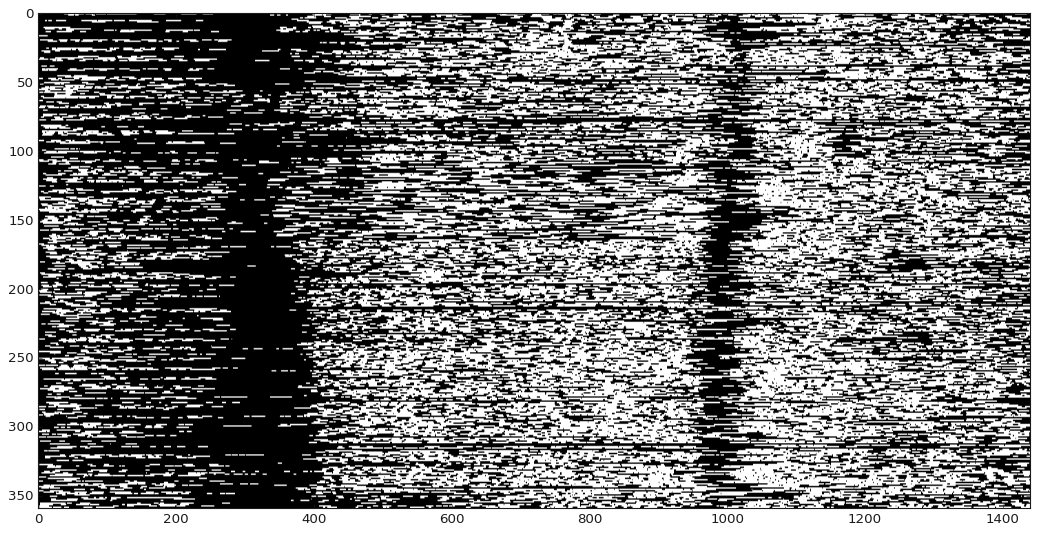

In [149]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

fig = plt.figure(figsize=(16, 10))
fig.patch.set_facecolor('white')

plt.imshow(np.vstack(daily_activity.values), cmap=plt.cm.gray, aspect=2)


# Trips and Fares

* Suppose we want to find the average tip and the average trip per taxi

* For this we will also need the fares data from the taxi dataset.

* Let's read in the fares data from the taxi dataset.

In [150]:
fares = pd.read_csv('data/nyc_taxi_fare_data_sample.csv')
fares

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,65EC798A9ED53A93185097CE3AB4B6F7,83F9CA9B3A9C773485F3A126A5624F59,VTS,2013-09-26 14:55:00,CRD,8.0,0.0,0.5,2.00,0.0,10.50
1,EB41562F6ECB5CA2630A85A1682D57FE,6E4A87E3A9C7D958173849EA98184485,VTS,2013-06-28 18:35:00,CSH,2.5,1.0,0.5,0.00,0.0,4.00
2,203F59092282F76DAC9A81111901EF58,FE46B32428CAA9E0C757564AAA4A65FA,VTS,2013-12-25 12:55:00,CRD,5.0,0.0,0.5,1.00,0.0,6.50
3,2DF9CA4377B28B8963C9BD57286F7FEF,B21EB3FDA842F30B1CD7A0A4EB48A81C,VTS,2013-12-07 14:15:00,UNK,6.0,0.0,0.5,1.20,0.0,7.70
4,CB80D176F6CD9006FFF14E02BAC57373,B4BEA054C63A0897CFC8478E1623E50B,CMT,2013-12-15 11:36:35,CSH,7.0,0.0,0.5,0.00,0.0,7.50
...,...,...,...,...,...,...,...,...,...,...,...
1731792,D86E7F8746EAB36031F9911F4D524FCA,41CA69EE7F53BA6B640C71859BF6DD78,VTS,2013-12-27 10:12:00,CRD,5.0,0.0,0.5,1.00,0.0,6.50
1731793,D978FA187038016567511C9FDF2DB955,FEB715D07F0B4A1F169CBB472D817E10,VTS,2013-07-24 19:24:00,CRD,17.5,1.0,0.5,5.55,0.0,24.55
1731794,A08966EE5F3A16148E008144ECB9706E,562DC827552676BA3E73DAD273F65E95,CMT,2013-03-09 23:45:37,CRD,8.5,0.5,0.5,2.00,0.0,11.50
1731795,BA34210DAECCFED1B8FFBB0372994B45,E5877814F11EDF278753F17FD444A29B,VTS,2013-07-17 10:34:00,CSH,6.0,0.0,0.5,0.00,0.0,6.50



* To find the average tip per taxi, we will use `groupby()` again.

In [151]:
avg_tip = fares[['medallion', 'tip_amount']].loc[fares.tip_amount > 0].\
    groupby('medallion').mean()
print(len(avg_tip))
avg_tip.head(3)

13444


,tip_amount
medallion,
00005007A9F30E289E760362F69E4EAD,2.429901
000318C2E3E6381580E5C99910A60668,2.803438
000351EDC735C079246435340A54C7C1,2.623333


* This is not exactly what we want; to combine the fares with the data we'll need to have `medallion` as a column, not as an index.

* To do that we'll use the `reset_index()` method so that although we group by `medallion` we get a numerical index.

* Otherwise `medallion` will become the index.

In [152]:
avg_tip = avg_tip.reset_index()
print(len(avg_tip))
avg_tip.head(3)

13444


,medallion,tip_amount
0,00005007A9F30E289E760362F69E4EAD,2.429901
1,000318C2E3E6381580E5C99910A60668,2.803438
2,000351EDC735C079246435340A54C7C1,2.623333


* We'll also get the average distance travelled per taxi.


In [153]:
avg_distance = trips[['medallion', 'trip_distance']].loc[trips.trip_distance > 0].\
    groupby('medallion').mean().reset_index()
print(len(avg_distance))
avg_distance.head(3)

13459


,medallion,trip_distance
0,00005007A9F30E289E760362F69E4EAD,2.485000
1,000318C2E3E6381580E5C99910A60668,2.601379
2,000351EDC735C079246435340A54C7C1,2.540789


* The next step is to join `tip_amount` from `avg_tip` and the `trip_distance` from `avg_distance`. 

* The `medallion` column appears in both the `avg_tip` and the `avg_distance` DataFrames.

* By identifying this special  field (also called the key) in both data sets, we can associate every row in `avg_tip` to a row in `avg_distance`. This operation is called a join in SQL.

* We do this with the `merge()` method in pandas.

In [154]:
data_merged = pd.merge(avg_distance, avg_tip, how='left', on='medallion')
data_merged.head(3)

,medallion,trip_distance,tip_amount
0,00005007A9F30E289E760362F69E4EAD,2.485000,2.429901
1,000318C2E3E6381580E5C99910A60668,2.601379,2.803438
2,000351EDC735C079246435340A54C7C1,2.540789,2.623333
